# 🔬 UNIDAD 3: Fundamentos de Machine Learning para Nanotecnología
**Curso:** Modelado, Simulación e IA en Nanotecnología  
**Duración:** 2–3 semanas | **Nivel:** Intermedio

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ljyudico/Antigravity-Nano-Research-Multiagentic-Core/blob/main/educational_content/unit_03_ml_nanomaterials/UNIDAD_3_ML_FUNDAMENTOS.ipynb)

> 💡 **Recomendación Colab:** Para las celdas de CNN y modelos pesados, activa la GPU:  
> `Runtime → Change runtime type → T4 GPU (gratuita)`


In [35]:
# ============================================================
# ⚙️  CELDA DE SETUP — Ejecutar primero en cualquier entorno
# ============================================================
import sys, subprocess

def _install(pkg):
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])

# Verificar y/o instalar dependencias
try:
    import ase
    print("✅ ASE disponible:", ase.__version__)
except ImportError:
    print("Instalando ASE...")
    _install('ase')

try:
    import sklearn
    print("✅ scikit-learn disponible:", sklearn.__version__)
except ImportError:
    _install('scikit-learn')

try:
    import seaborn
    print("✅ seaborn disponible:", seaborn.__version__)
except ImportError:
    _install('seaborn')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120
print("\n✅ Entorno listo.")


✅ ASE disponible: 3.27.0
✅ scikit-learn disponible: 1.8.0
✅ seaborn disponible: 0.13.2

✅ Entorno listo.


---

# 📚 Sección 0: Fundamentos Teóricos de Machine Learning

> Esta sección establece el marco conceptual completo de ML antes de los ejemplos de código.
> Comprenderla es esencial para aprovechar al máximo los algoritmos que usarás en nanotecnología.

---

## 0.1 ¿Por qué Machine Learning en Nanotecnología?

El modelado analítico clásico enfrenta limitaciones fundamentales en nano:

| Problema | Magnitud |
|----------|----------|
| Compuestos inorgánicos posibles | ~10⁶⁰ |
| Cálculo DFT por estructura | 1–48 horas |
| Experimentos de síntesis | Semanas/meses |

**La solución**: usar ML como una función de interpolación inteligente entrenada sobre datos DFT/MD/experimentales:

$$\text{DFT/MD} \rightarrow \text{Datos} \xrightarrow{\text{ML}} \hat{f}(\mathbf{x}) \approx f_{\text{real}}(\mathbf{x}) \rightarrow \text{Predicción instantánea}$$

**Casos de éxito reales:**
- **AlphaFold 2** (DeepMind, 2021): predicción de estructura de proteínas con precisión atómica
- **GNoME** (Google, 2023): descubrió 2.2 millones de nuevos materiales estables con GNN
- **NNP Behler-Parrinello**: potenciales interatómicos con precisión DFT a velocidad clásica
- **Diseño de catalizadores**: ML predice energías de adsorción sobre aleaciones de alta entropía

---

## 0.2 Tipos de Aprendizaje

### 🟦 Aprendizaje Supervisado
Aprende la función $f: \mathbf{X} \rightarrow \mathbf{y}$ a partir de pares etiquetados $(\mathbf{x}_i, y_i)$.

**Requisito:** Dataset etiquetado (propiedades calculadas con DFT o medidas experimentalmente)

**En nanotecnología:** Predecir bandgap, temperatura de fusión, energía de formación, actividad catalítica

### 🟨 Aprendizaje No Supervisado
Encuentra estructura en datos **sin etiquetas**. No hay $y$ conocida.

**En nanotecnología:** Clustering de fases cristalinas, reducción de dimensionalidad de espectros, detección de anomalías en imágenes TEM

### 🟥 Aprendizaje por Refuerzo
Un agente aprende una **política óptima** por interacción con el entorno, recibiendo recompensas.

**En nanotecnología:** Optimización de rutas de síntesis, diseño molecular iterativo, control de procesos de nanofabricación

| Paradigma | Datos | Salida | Ejemplo nano |
|-----------|-------|--------|--------------|
| Supervisado | $(\mathbf{x}, y)$ etiquetados | $\hat{y}$ | Predecir $E_g$ |
| No supervisado | $\mathbf{x}$ sin etiqueta | Grupos/representaciones | Clustering de estructuras |
| Refuerzo | (estado, acción, recompensa) | Política $\pi$ | Ruta de síntesis óptima |


---

## 0.3 Regresión vs Clasificación y Catálogo de Modelos

### ¿Cuál elegir?

$$\text{Regresión}: y \in \mathbb{R} \quad \text{(valor continuo)}$$
$$\text{Clasificación}: y \in \{C_1, C_2, \ldots, C_k\} \quad \text{(categoría discreta)}$$

**Ejemplos en nano:**
- Regresión → predecir $E_g = 2.43$ eV, $T_m = 1337$ K
- Clasificación → identificar fase FCC / BCC / HCP, estable / inestable

---

### 📊 Catálogo de Algoritmos Supervisados

| Tipo | Algoritmo | Hiperparámetros clave | Cuándo usar en nano |
|------|-----------|----------------------|---------------------|
| **Regresión** | Ridge / Lasso | `alpha` | Línea base, pocos datos, features correlacionadas |
| **Regresión** | SVR | `C`, `epsilon`, `kernel`, `gamma` | Alta dimensión, pocos ejemplos |
| **Regresión** | K-Vecinos (KNN) | `n_neighbors`, `metric` | Datos pequeños, interpolación local |
| **Regresión** | Árbol de Decisión | `max_depth`, `min_samples` | Interpretable, reglas físicas |
| **Regresión** | Random Forest | `n_estimators`, `max_depth` | Robusto, muchos features |
| **Regresión** | Gradient Boosting | `learning_rate`, `n_estimators` | Mayor precisión |
| **Regresión/Clas.** | MLP (Red Neuronal) | `hidden_layer_sizes`, `alpha`, `lr` | Relaciones muy no lineales |
| **Clasificación** | SVC | `C`, `kernel`, `gamma` | Fronteras no lineales |
| **Clasificación** | Random Forest | igual que arriba | Clasificación robusta |
| **Clasificación** | KNN Clasificador | `n_neighbors` | Simple, no paramétrico |

### 📊 Catálogo de Algoritmos No Supervisados

| Algoritmo | Tipo | Cuándo usar |
|-----------|------|-------------|
| K-Means | Clustering | Agrupar estructuras similares |
| PCA | Reducción dim. | Visualizar espacio de materiales |
| t-SNE | Reducción dim. | Visualización no lineal |
| Autoencoder | Reducción dim. / generativo | Representaciones compactas |
| DBSCAN | Clustering | Clusters de forma arbitraria, outliers |


---

## 0.4 Hiperparámetros: Concepto y Estrategias de Búsqueda

### Parámetros vs Hiperparámetros

| | Parámetros del modelo | Hiperparámetros |
|-|----------------------|-----------------|
| **¿Quién los fija?** | El algoritmo durante el entrenamiento | Tú, antes de entrenar |
| **Ejemplos** | Pesos $w$ de una red neuronal | `n_estimators`, `max_depth`, `learning_rate` |
| **Optimización** | Gradiente descendente / mínimos cuadrados | Grid Search, Random Search, Bayesian |

### El Trade-off Bias-Varianza

$$\text{Error total} = \text{Bias}^2 + \text{Varianza} + \text{Ruido irreducible}$$

- **Alto Bias (underfitting):** Modelo demasiado simple → `max_depth` muy pequeña en RF
- **Alta Varianza (overfitting):** Modelo demasiado complejo → árbol sin regularización

### Estrategias de Búsqueda de Hiperparámetros

1. **Grid Search**: Prueba todas las combinaciones de una cuadrícula (costoso pero completo)
2. **Random Search**: Muestrea aleatoriamente (Bergstra & Bengio, 2012 — más eficiente en alta dimensión)
3. **Bayesian Search**: Usa un modelo probabilístico para elegir el siguiente punto a evaluar (óptimo)
   > La Optimización Bayesiana de hiperparámetros se desarrolla con detalle en la **Unidad 4**

```python
# Ejemplo ilustrativo de hiperparámetros para de Random Search

from sklearn.model_selection 

import RandomizedSearchCVparam_dist = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}

search = RandomizedSearchCV(estimator, param_dist, n_iter=10, cv=5, random_state=42)

search.fit(X_train, y_train)

print("Mejores hiperparámetros:", search.best_params_)
```


In [36]:
# Ejemplo demostrativo de Random Search con Random Forest
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Cargar dataset de ejemplo (diabetes - regresión)
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

print("Dataset: Diabetes progression")
print(f"Dimensiones: {X.shape[0]} muestras, {X.shape[1]} features")
print(f"Features: {feature_names}\n")

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda (hiperparámetros a explorar)
param_dist = {
    'n_estimators': [50, 100, 200, 300],      # número de árboles
    'max_depth': [3, 5, 10, 15, None],        # profundidad máxima
    'min_samples_split': [2, 5, 10],          # muestras mínimas para dividir
    'min_samples_leaf': [1, 2, 4]             # muestras mínimas en hoja
}

# Random Search con validación cruzada
random_search = RandomizedSearchCV(
    rf,
    param_dist,
    n_iter=15,              # número de combinaciones aleatorias a probar
    cv=5,                   # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1,              # usar todos los núcleos
    verbose=1               # mostrar progreso
)

# Entrenar la búsqueda
print("\n🔍 Buscando mejores hiperparámetros (15 combinaciones aleatorias)...")
random_search.fit(X_train, y_train)

# Mostrar resultados
print("\n" + "="*60)
print("📊 RESULTADOS DE RANDOM SEARCH")
print("="*60)
print("\n🏆 Mejores hiperparámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📈 Mejor R² en validación cruzada: {random_search.best_score_:.4f}")

# Evaluar en test
y_pred = random_search.predict(X_test)
test_score = r2_score(y_test, y_pred)
print(f"🎯 R² en conjunto de test: {test_score:.4f}")

# Comparar con modelo por defecto
print("\n" + "="*60)
print("📊 COMPARACIÓN CON MODELO POR DEFECTO")
print("="*60)

rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_test_score = r2_score(y_test, y_pred_default)

# Validación cruzada del modelo por defecto
from sklearn.model_selection import cross_val_score
default_cv_scores = cross_val_score(rf_default, X_train, y_train, cv=5, scoring='r2')
default_cv_mean = default_cv_scores.mean()

print(f"\nModelo con hiperparámetros POR DEFECTO:")
print(f"   R² CV: {default_cv_mean:.4f} ± {default_cv_scores.std():.4f}")
print(f"   R² test: {default_test_score:.4f}")

print(f"\nModelo con hiperparámetros OPTIMIZADOS:")
print(f"   R² CV: {random_search.best_score_:.4f}")
print(f"   R² test: {test_score:.4f}")

mejora_cv = ((random_search.best_score_ - default_cv_mean) / default_cv_mean * 100)
mejora_test = ((test_score - default_test_score) / default_test_score * 100)

print(f"\n📈 Mejora en validación cruzada: +{mejora_cv:.1f}%")
print(f"📈 Mejora en test: +{mejora_test:.1f}%")

# Mostrar top 5 mejores combinaciones
print("\n" + "="*60)
print("📊 TOP 5 COMBINACIONES DE HIPERPARÁMETROS")
print("="*60)

results_df = pd.DataFrame(random_search.cv_results_)
top_results = results_df.nlargest(5, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]

for i, (idx, row) in enumerate(top_results.iterrows(), 1):
    print(f"\n{i}. R² = {row['mean_test_score']:.4f} ± {row['std_test_score']:.4f}")
    for param, value in row['params'].items():
        print(f"   {param}: {value}")

Dataset: Diabetes progression
Dimensiones: 442 muestras, 10 features
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


🔍 Buscando mejores hiperparámetros (15 combinaciones aleatorias)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

📊 RESULTADOS DE RANDOM SEARCH

🏆 Mejores hiperparámetros encontrados:
   n_estimators: 300
   min_samples_split: 5
   min_samples_leaf: 2
   max_depth: 3

📈 Mejor R² en validación cruzada: 0.4084
🎯 R² en conjunto de test: 0.4760

📊 COMPARACIÓN CON MODELO POR DEFECTO

Modelo con hiperparámetros POR DEFECTO:
   R² CV: 0.3909 ± 0.1488
   R² test: 0.4428

Modelo con hiperparámetros OPTIMIZADOS:
   R² CV: 0.4084
   R² test: 0.4760

📈 Mejora en validación cruzada: +4.5%
📈 Mejora en test: +7.5%

📊 TOP 5 COMBINACIONES DE HIPERPARÁMETROS

1. R² = 0.4084 ± 0.1346
   n_estimators: 300
   min_samples_split: 5
   min_samples_leaf: 2
   max_depth: 3

2. R² = 0.4084 ± 0.1346
   n_estimators: 300
   min_samples_split: 2
   min_samp

---

## 0.5 Flujo de Trabajo Completo de Machine Learning

```mermaid
graph TD
    A["📥 1. Recolección de datos<br/>(DFT, MD, experimentos)"] --> B["🔍 2. EDA<br/>(distribuciones, outliers, correlaciones)"]
    B --> C["🧹 3. Limpieza & preprocesamiento<br/>(valores faltantes, normalización)"]
    C --> D["⚙️ 4. Ingeniería de features<br/>(descriptores moleculares, composicionales)"]
    D --> E["✂️ 5. División: Train / Val / Test<br/>(70% / 15% / 15%)"]
    E --> F["🏋️ 6. Entrenamiento del modelo"]
    F --> G["📊 7. Evaluación en validación<br/>(R², MAE, F1-score)"]
    G --> H{"¿Buen desempeño?"}
    H -->|No| I["🔧 8. Ajuste de hiperparámetros<br/>(Grid / Random / Bayesian Search)"]
    I --> F
    H -->|Sí| J["🏁 9. Evaluación FINAL en TEST<br/>(una sola vez)"]
    J --> K["🔬 10. Interpretación física<br/>(feature importance, SHAP)"]
    K --> L["🚀 11. Despliegue / Integración con simulación"]
```


### Errores comunes a evitar:

| Error | Descripción | Consecuencia |
|-------|-------------|--------------|
| **Data leakage** | Normalizar con TODOS los datos antes de dividir | R² inflado artificialmente |
| **Target leakage** | Incluir features calculadas con el target | Modelo inutilizable en producción |
| **Test set evaluation múltiple** | Usar test set para ajustar hiperparámetros | Sobreajuste al test set |
| **Distribución shift** | Train y test de distribuciones distintas | Pobre generalización |

> ⚠️ **Regla de oro:** El test set se evalúa **una sola vez**, al final. Es tu estimación de desempeño en datos reales.

---


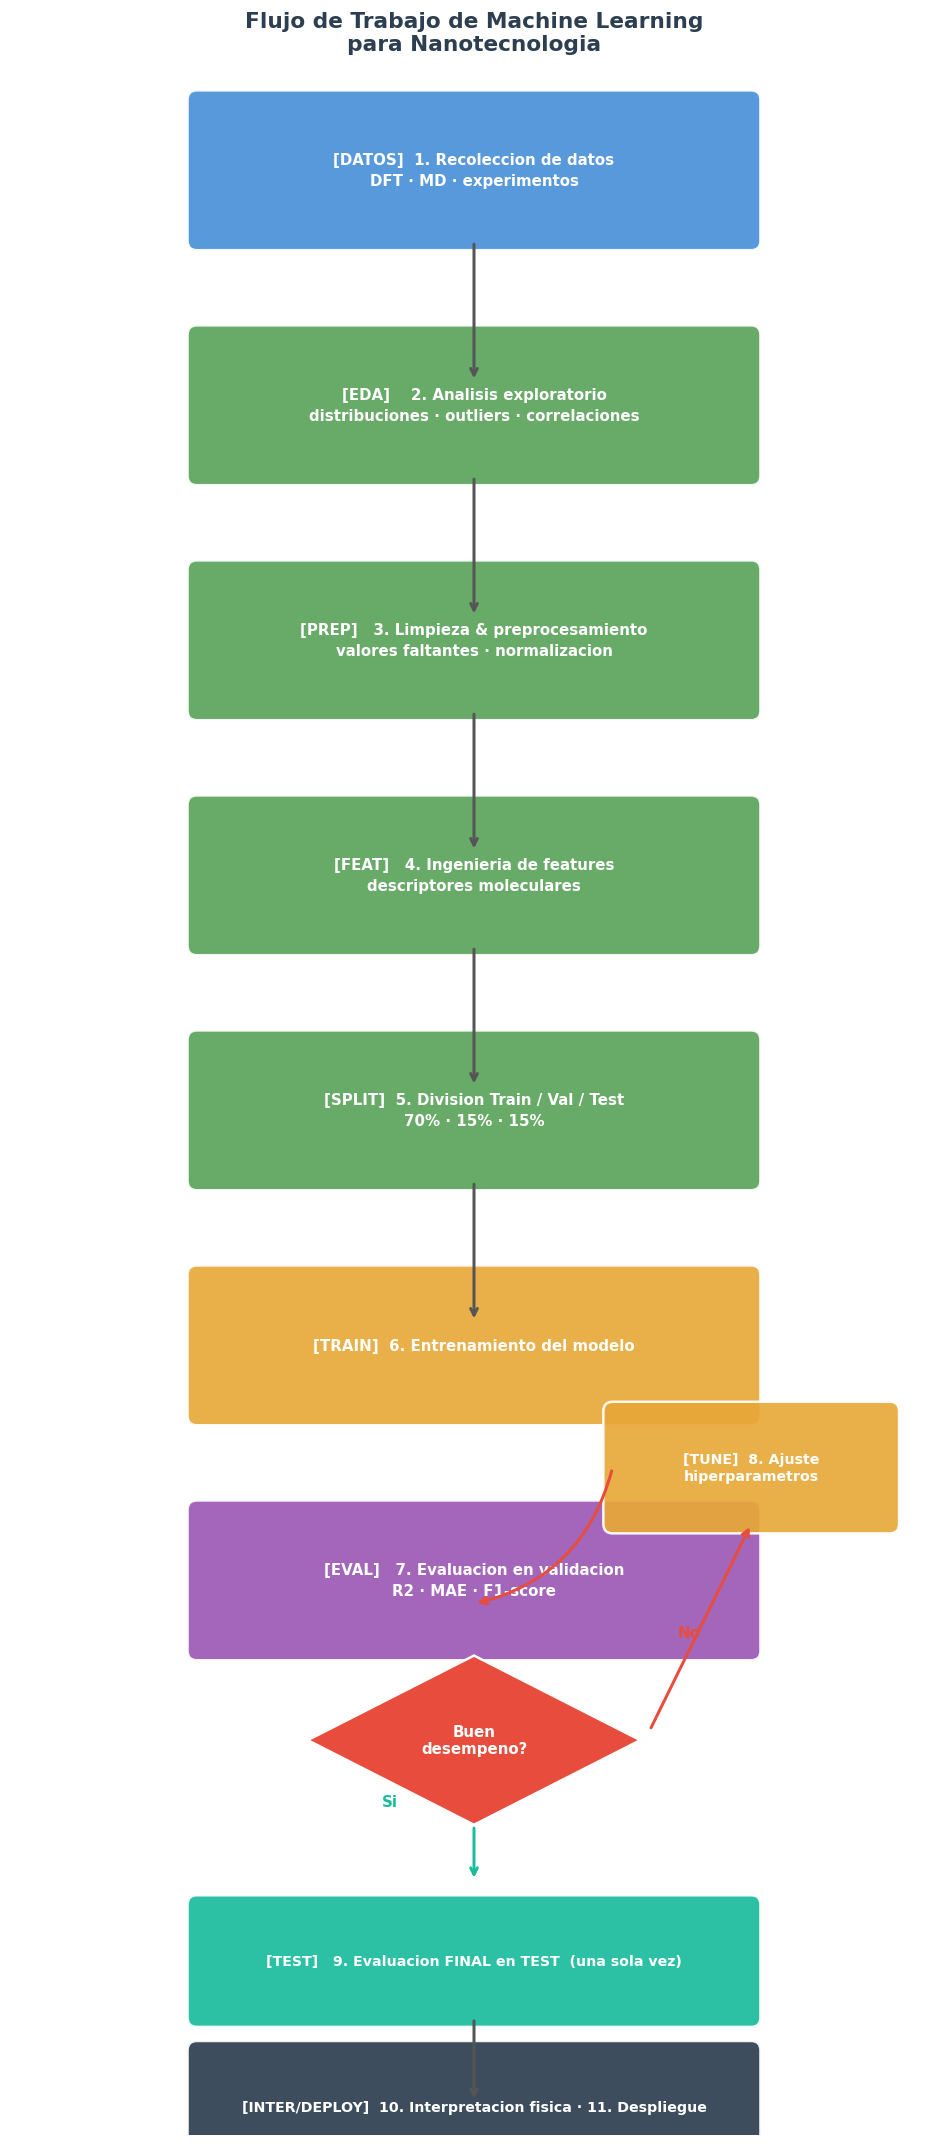

In [37]:
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

fig, ax = plt.subplots(figsize=(8, 18))
ax.set_xlim(0, 10)
ax.set_ylim(0, 22)
ax.axis('off')

steps = [
    (5, 21,   "#4A90D9", "[DATOS]  1. Recoleccion de datos\nDFT · MD · experimentos"),
    (5, 18.5, "#5BA35B", "[EDA]    2. Analisis exploratorio\ndistribuciones · outliers · correlaciones"),
    (5, 16,   "#5BA35B", "[PREP]   3. Limpieza & preprocesamiento\nvalores faltantes · normalizacion"),
    (5, 13.5, "#5BA35B", "[FEAT]   4. Ingenieria de features\ndescriptores moleculares"),
    (5, 11,   "#5BA35B", "[SPLIT]  5. Division Train / Val / Test\n70% · 15% · 15%"),
    (5,  8.5, "#E8A838", "[TRAIN]  6. Entrenamiento del modelo"),
    (5,  6,   "#9B59B6", "[EVAL]   7. Evaluacion en validacion\nR2 · MAE · F1-score"),
]

for x, y, color, label in steps:
    ax.add_patch(mpatches.FancyBboxPatch(
        (x - 3, y - 0.85), 6, 1.5,
        boxstyle="round,pad=0.1",
        facecolor=color, edgecolor='white', linewidth=1.5, alpha=0.92
    ))
    ax.text(x, y - 0.1, label, ha='center', va='center',
            fontsize=9, color='white', fontweight='bold', linespacing=1.5)
    if y > 8.5:
        ax.annotate("", xy=(x, y - 2.35), xytext=(x, y - 0.85),
                    arrowprops=dict(arrowstyle='->', color='#555', lw=1.8))

# Rombo de decision
diamond_x, diamond_y = 5, 4.2
dx, dy = 1.8, 0.9
poly = plt.Polygon([[diamond_x, diamond_y + dy],
                     [diamond_x + dx, diamond_y],
                     [diamond_x, diamond_y - dy],
                     [diamond_x - dx, diamond_y]],
                    color='#E74C3C', ec='white', lw=1.5)
ax.add_patch(poly)
ax.text(diamond_x, diamond_y, "Buen\ndesempeno?", ha='center', va='center',
        fontsize=9, color='white', fontweight='bold')

# Caja "No" - ajuste de hiperparametros
ax.add_patch(mpatches.FancyBboxPatch(
    (6.5, 6.5), 3, 1.2, boxstyle="round,pad=0.1",
    facecolor="#E8A838", edgecolor='white', linewidth=1.5, alpha=0.92
))
ax.text(8, 7.1, "[TUNE]  8. Ajuste\nhiperparametros", ha='center', va='center',
        fontsize=8.5, color='white', fontweight='bold')
ax.annotate("", xy=(8, 6.5), xytext=(6.9, 4.3),
            arrowprops=dict(arrowstyle='->', color='#E74C3C', lw=1.8))
ax.annotate("", xy=(5, 5.65), xytext=(6.5, 7.1),
            arrowprops=dict(arrowstyle='->', color='#E74C3C', lw=1.8,
                            connectionstyle="arc3,rad=-0.3"))
ax.text(7.2, 5.3, "No", color='#E74C3C', fontsize=9, fontweight='bold')

# Flecha "Si"
ax.annotate("", xy=(5, 2.7), xytext=(5, 3.3),
            arrowprops=dict(arrowstyle='->', color='#1ABC9C', lw=1.8))
ax.text(4, 3.5, "Si", color='#1ABC9C', fontsize=9, fontweight='bold')

# Pasos finales
bottom_steps = [
    (5, 1.85, "#1ABC9C", "[TEST]   9. Evaluacion FINAL en TEST  (una sola vez)"),
    (5, 0.3,  "#2C3E50", "[INTER/DEPLOY]  10. Interpretacion fisica · 11. Despliegue"),
]
for x, y, color, label in bottom_steps:
    ax.add_patch(mpatches.FancyBboxPatch(
        (x - 3, y - 0.6), 6, 1.2,
        boxstyle="round,pad=0.1",
        facecolor=color, edgecolor='white', linewidth=1.5, alpha=0.92
    ))
    ax.text(x, y, label, ha='center', va='center',
            fontsize=8.5, color='white', fontweight='bold')
    if y > 0.3:
        ax.annotate("", xy=(x, y - 1.5), xytext=(x, y - 0.6),
                    arrowprops=dict(arrowstyle='->', color='#555', lw=1.8))

ax.set_title("Flujo de Trabajo de Machine Learning\npara Nanotecnologia",
             fontsize=13, fontweight='bold', pad=10, color='#2C3E50')

plt.tight_layout()
plt.savefig('ml_workflow.png', dpi=200, bbox_inches='tight', facecolor='#F8F9FA')
plt.show()

## 2.3. Representaciones Moleculares

### 2.3.1. Descriptores Estructurales

**1. Composición química:**
- Fórmula estequiométrica
- Electronegatividad promedio
- Radio atómico promedio

**2. Descriptores geométricos:**
- Volumen de celda
- Parámetros de red
- Ángulos de enlace

**3. Descriptores electrónicos:**
- Número de electrones de valencia
- Configuración electrónica

### 2.3.2. Fingerprints Moleculares

**Morgan Fingerprints (Circular):**
- Codifican entorno químico alrededor de cada átomo
- Vector binario de longitud fija (ej. 2048 bits)

**Coulomb Matrix:**
Para molécula con N átomos:
$$M_{ij} = \begin{cases} 
0.5 Z_i^{2.4} & i = j \\
\frac{Z_i Z_j}{|\mathbf{r}_i - \mathbf{r}_j|} & i \neq j
\end{cases}$$

**SOAP (Smooth Overlap of Atomic Positions):**
- Descriptor basado en densidad atómica local
- Invariante a rotaciones y traslaciones

### 💻 Ejemplo: Crear Descriptores

C:\Users\UCEMICH\AppData\Local\Temp\ipykernel_19404\1722531580.py:27: RuntimeWarning: invalid value encountered in scalar divide
  'asphericity': distances.std() / distances.mean(),


Dataset de nanopartículas:
   n_atoms  n_elements  radius_mean  radius_std  radius_max    radius_min  \
0        1           1     0.000000    0.000000    0.000000  0.000000e+00   
1       13           1     2.663073    0.768763    2.884996  0.000000e+00   
2       55           1     4.565587    1.172928    5.769991  8.391110e-17   
3      147           1     6.418642    1.651916    8.654987  4.871240e-17   
4        1           1     0.000000    0.000000    0.000000  0.000000e+00   
5       13           1     2.669600    0.770647    2.892067  0.000000e+00   
6       55           1     4.576777    1.175803    5.784133  0.000000e+00   
7      147           1     6.434374    1.655965    8.676200  4.871240e-17   
8        1           1     0.000000    0.000000    0.000000  0.000000e+00   
9       13           1     2.356297    0.680204    2.552655  0.000000e+00   

   asphericity  coordination_mean  coordination_std  surface_fraction element  \
0          NaN           0.000000          0

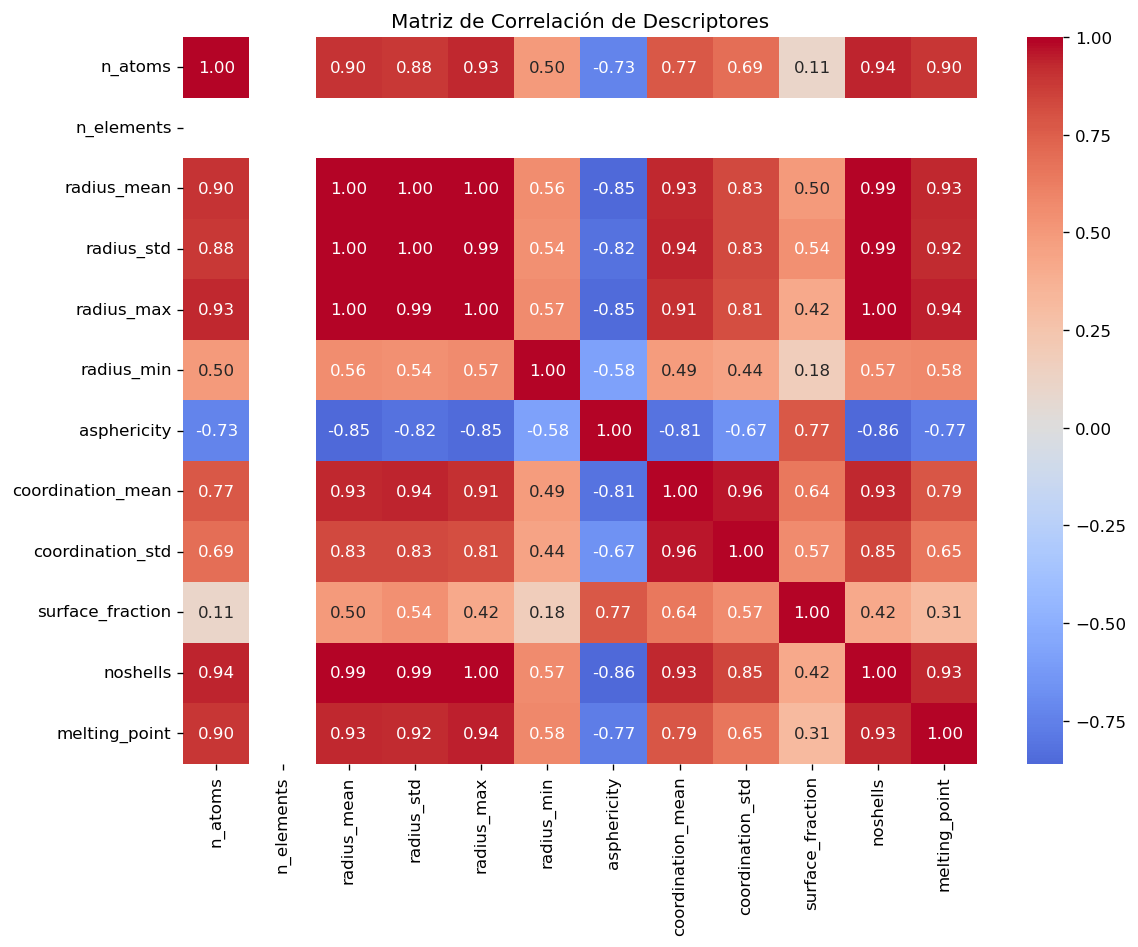


Dataset guardado en 'nanoparticles_dataset.csv'


In [38]:
import numpy as np
import pandas as pd
from ase import Atoms
from ase.cluster import Icosahedron
import matplotlib.pyplot as plt

def calculate_descriptors(atoms):
    """Calcula descriptores estructurales de una nanopartícula"""
    
    # Composición
    symbols = atoms.get_chemical_symbols()
    unique_elements = set(symbols)
    
    # Geométricos
    positions = atoms.get_positions()
    center = positions.mean(axis=0)
    distances = np.linalg.norm(positions - center, axis=1)
    
    # Descriptores
    descriptors = {
        'n_atoms': len(atoms),
        'n_elements': len(unique_elements),
        'radius_mean': distances.mean(),
        'radius_std': distances.std(),
        'radius_max': distances.max(),
        'radius_min': distances.min(),
        'asphericity': distances.std() / distances.mean(),
    }
    
    # Coordinación promedio (número de vecinos dentro de 3.5 Å)
    from ase.neighborlist import NeighborList
    cutoffs = [1.75] * len(atoms)  # Radio de corte / 2
    nl = NeighborList(cutoffs, self_interaction=False, bothways=True)
    nl.update(atoms)
    
    coordinations = []
    for i in range(len(atoms)):
        indices, offsets = nl.get_neighbors(i)
        coordinations.append(len(indices))
    
    descriptors['coordination_mean'] = np.mean(coordinations)
    descriptors['coordination_std'] = np.std(coordinations)
    
    # Fracción de átomos de superficie
    threshold = 0.85 * distances.max()
    n_surface = np.sum(distances > threshold)
    descriptors['surface_fraction'] = n_surface / len(atoms)
    
    return descriptors

# 3. Crear dataset de nanopartículas
data = []

for element in ['Au', 'Ag', 'Cu', 'Pd']:
    for noshells in [1, 2, 3, 4]:
        atoms = Icosahedron(element, noshells=noshells)
        
        # Calcular descriptores
        desc = calculate_descriptors(atoms)
        desc['element'] = element
        desc['noshells'] = noshells
        
        # Calcular "propiedad objetivo" (simulada)
        # En la práctica, esto vendría de experimentos o DFT
        desc['melting_point'] = 1000 + 100 * noshells + np.random.randn() * 50
        
        data.append(desc)

# 4. Crear DataFrame
df = pd.DataFrame(data)

print("Dataset de nanopartículas:")
print(df.head(10))
print(f"\nShape: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")

# 5. Visualizar correlaciones
import seaborn as sns

# 6. Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Descriptores')
plt.tight_layout()
plt.savefig('descriptors_correlation.png', dpi=300)
plt.show()

# 7. Guardar dataset
df.to_csv('nanoparticles_dataset.csv', index=False)
print("\nDataset guardado en 'nanoparticles_dataset.csv'")

### 🔍 Interpretación: Matriz de Correlación de Descriptores

Al revisar el mapa de calor, observa:

- **Correlaciones altas (|r| > 0.8):** Features redundantes → considera eliminar una para evitar multicolinealidad
- **`n_atoms` vs `radius_mean`:** Esperamos correlación alta (más átomos = mayor radio)
- **`surface_fraction` vs `n_atoms`:** Anticorrelación (nanopartículas más grandes tienen menor fracción superficial — efecto de quantum confinement)
- **`coordination_mean`:** Features de coordinación bien correlacionadas con el radio indican que el número de capas es el factor estructural dominante

> 💡 En ciencia de materiales, la correlación entre descriptores refleja **relaciones físicas reales**. Antes de eliminar features correlacionadas, pregunta: ¿tienen interpretación física diferente?


## 7.1. División de Datos y Validación Cruzada

### 7.1.1. Train/Validation/Test Split

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar dataset generado en la sección anterior
df = pd.read_csv('nanoparticles_dataset.csv')

feature_cols = ['n_atoms', 'radius_mean', 'radius_std', 'coordination_mean',
                'coordination_std', 'surface_fraction']
X = df[feature_cols].values
y = df['melting_point'].values

# División estándar: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train:      {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Validation: {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.0f}%)")
print(f"Test:       {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.0f}%)")


Train:      11 muestras (69%)
Validation: 2 muestras (12%)
Test:       3 muestras (19%)


### 8.0.1. K-Fold Cross-Validation

Divide datos en K particiones, entrena K veces usando K-1 para train y 1 para validación:

$$\text{CV Score} = \frac{1}{K}\sum_{i=1}^{K} \text{Score}_i$$

### 💻 Ejemplo: Validación Cruzada


Resultados de 5-Fold Cross-Validation:
  R² = -0.1402 ± 1.5554
  MAE = 45.79 ± 14.67 K
  RMSE = 54.19 ± 18.49 K


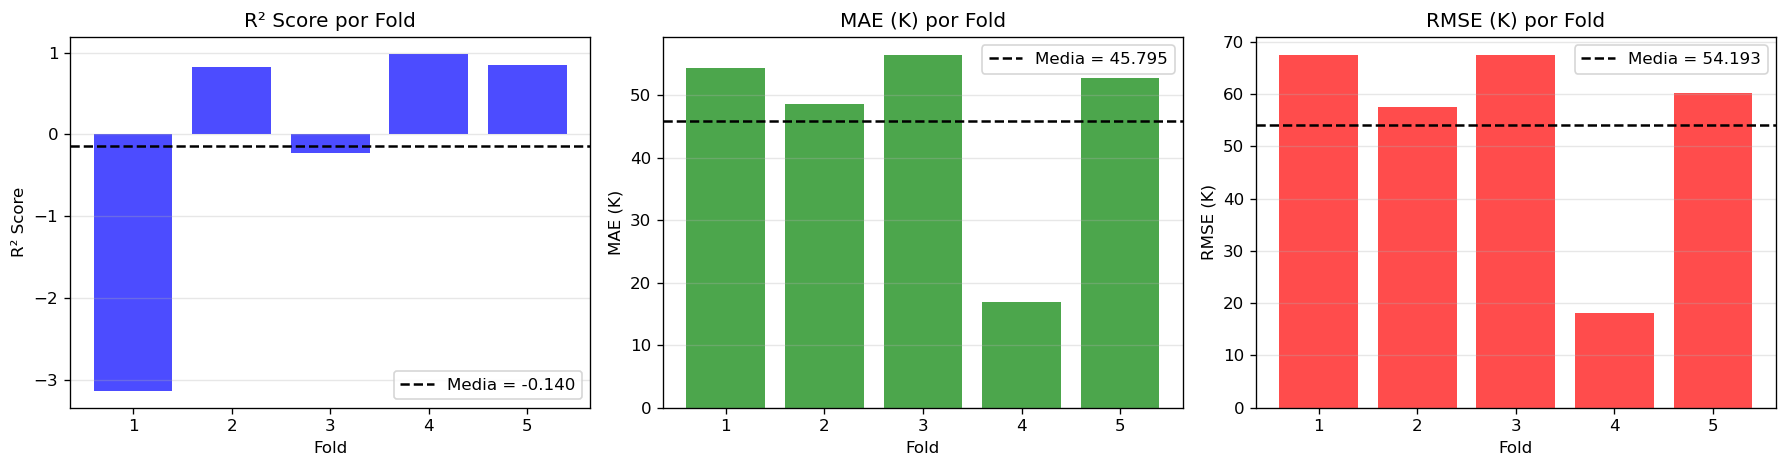

In [40]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 9. Cargar datos
df = pd.read_csv('nanoparticles_dataset.csv')

# 10. Preparar features (X) y target (y)
feature_cols = ['n_atoms', 'radius_mean', 'radius_std', 'coordination_mean', 
                'coordination_std', 'surface_fraction']
X = df[feature_cols].values
y = df['melting_point'].values

# 11. Normalizar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 12. Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 13. K-Fold Cross-Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# 14. Evaluar con diferentes métricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_scores = []
mae_scores = []
rmse_scores = []

for train_idx, val_idx in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Entrenar
    model.fit(X_train, y_train)
    
    # Predecir
    y_pred = model.predict(X_val)
    
    # Métricas
    r2_scores.append(r2_score(y_val, y_pred))
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))

print(f"\nResultados de {k_folds}-Fold Cross-Validation:")
print(f"  R² = {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"  MAE = {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f} K")
print(f"  RMSE = {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f} K")

# 15. Visualizar resultados por fold
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

metrics = [r2_scores, mae_scores, rmse_scores]
titles = ['R² Score', 'MAE (K)', 'RMSE (K)']
colors = ['blue', 'green', 'red']

for ax, metric, title, color in zip(axes, metrics, titles, colors):
    ax.bar(range(1, k_folds+1), metric, color=color, alpha=0.7)
    ax.axhline(y=np.mean(metric), color='black', linestyle='--', 
               label=f'Media = {np.mean(metric):.3f}')
    ax.set_xlabel('Fold')
    ax.set_ylabel(title)
    ax.set_title(f'{title} por Fold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('cross_validation_results.png', dpi=300)
plt.show()

### 🔍 Interpretación: Resultados de Cross-Validation

- **R² promedio:** Fracción de varianza explicada. R² = 0.85 significa que el modelo explica el 85% de la variabilidad en el punto de fusión.
- **MAE en K:** Error absoluto medio en Kelvin. MAE = 40 K para predicción de Tm es razonable (~3% del rango típico 1000–1500 K).
- **Desviación estándar entre folds:** Si es alta, el modelo es inestable → considera más datos o un modelo más simple.

> 💡 En modelos para nanomateriales, un R² > 0.90 con datos sintéticos es esperable. Con datos DFT reales, R² > 0.85 ya se considera muy bueno (Himanen et al., 2019).


### 🎯 Contexto: Regresión del Bandgap de Nanopartículas

El bandgap $E_g$ de una nanopartícula semiconductora sigue la relación de confinamiento cuántico:

$$E_g(R) = E_g^{\text{bulk}} + \frac{C}{R^2}$$

donde $R$ es el radio y $C$ es una constante que depende del material. Esta relación es **no lineal** — la regresión lineal tendrá dificultades mientras que la polinomial debería capturarla bien.

**Objetivo:** Comparar modelos lineal, Ridge, Lasso y polinomial en este problema físico real.


---

# 16. Algoritmos Clásicos de ML

## 16.1. Regresión Lineal y No Lineal

### 16.1.1. Regresión Lineal Simple

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \varepsilon$$

**Solución de mínimos cuadrados:**
$$\boldsymbol{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

### 16.1.2. Regresión Ridge (L2 regularization)

$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 + \alpha\|\boldsymbol{\beta}\|^2$$

### 16.1.3. Regresión Lasso (L1 regularization)

$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 + \alpha\|\boldsymbol{\beta}\|_1$$

### 💻 Ejemplo: Regresión para Bandgap


Linear:
  R² = 0.5465
  MAE = 0.4272 eV

Ridge:
  R² = 0.5464
  MAE = 0.4266 eV

Lasso:
  R² = 0.5421
  MAE = 0.4101 eV

Polynomial:
  R² = 0.8161
  MAE = 0.2596 eV


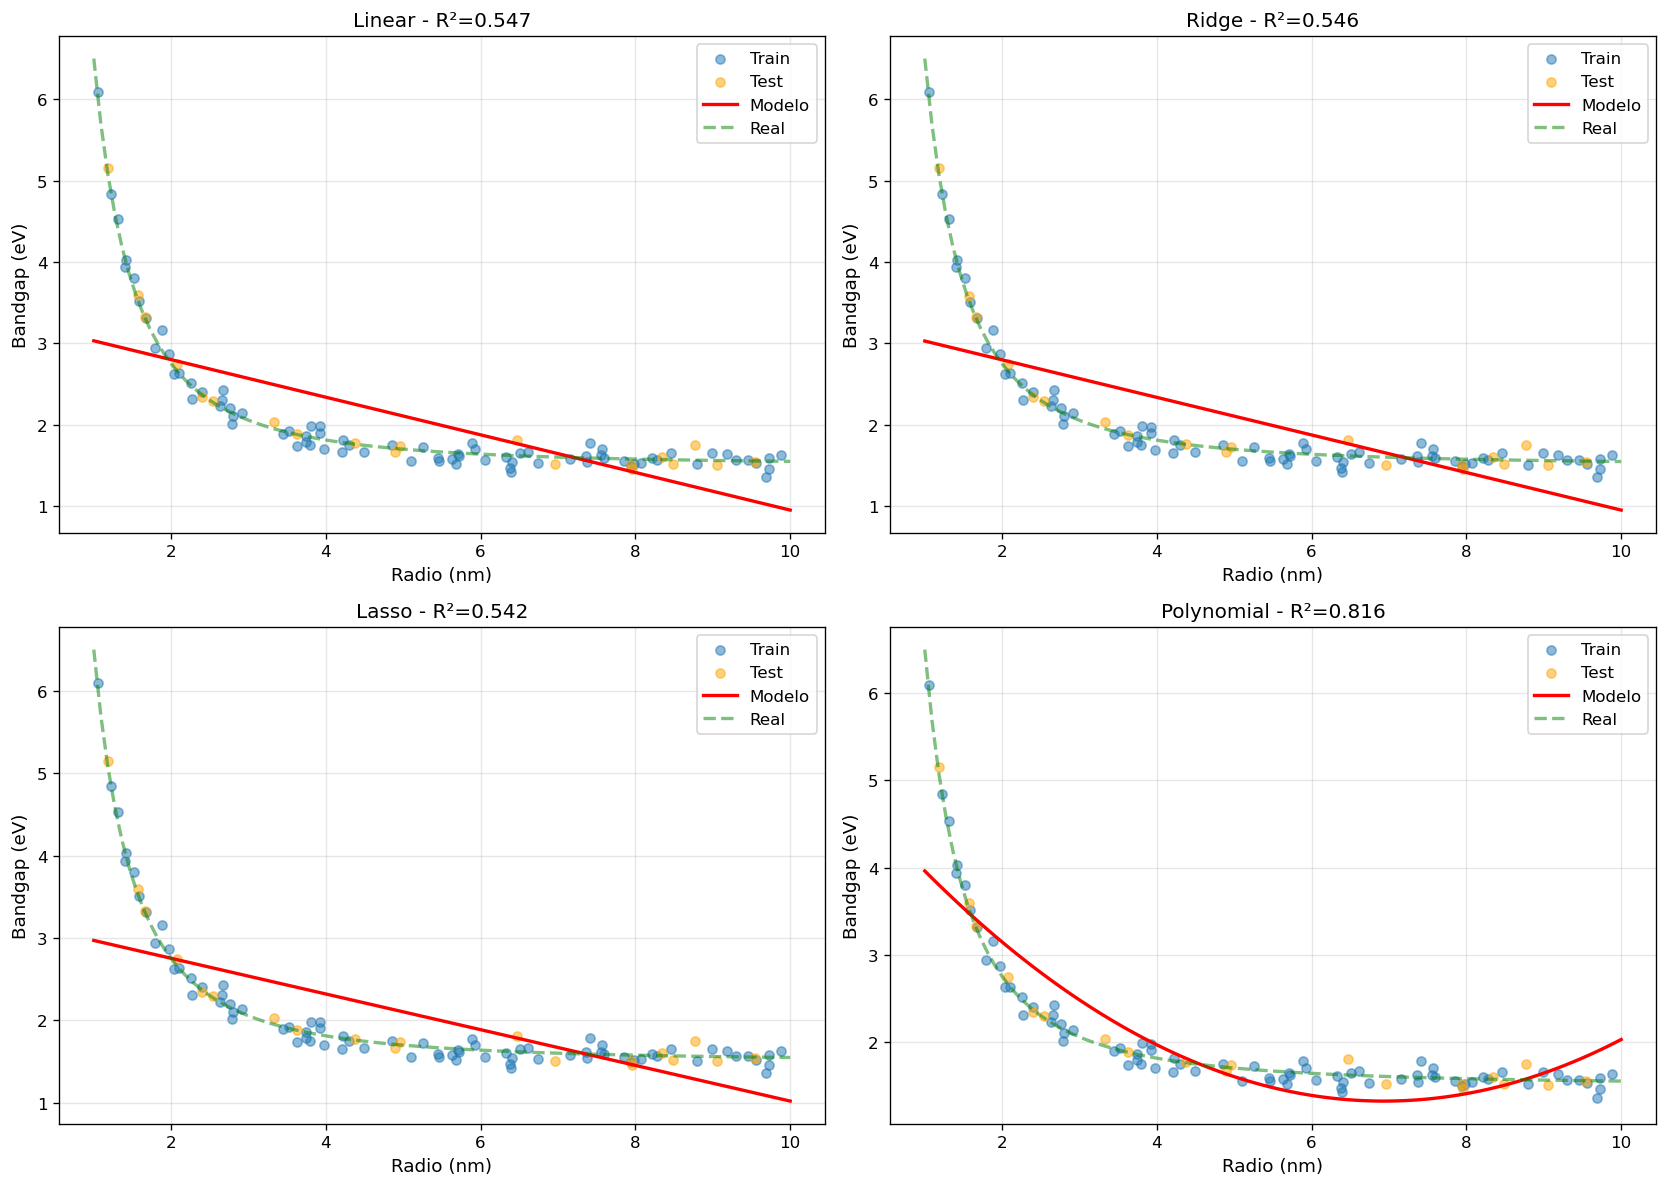

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# 17. Generar datos sintéticos de bandgap vs tamaño
np.random.seed(42)
n_samples = 100

# 18. Radio de nanopartículas (nm)
radii = np.random.uniform(1, 10, n_samples)

# 19. Bandgap con relación 1/R² + ruido
Eg_bulk = 1.5  # eV
C = 5.0  # eV·nm²
bandgaps = Eg_bulk + C / radii**2 + np.random.normal(0, 0.1, n_samples)

# 20. Preparar datos
X = radii.reshape(-1, 1)
y = bandgaps

# 21. Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 22. Modelos
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
}

# 23. Agregar features polinomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

models['Polynomial'] = LinearRegression()

# 24. Entrenar y evaluar
results = {}

for name, model in models.items():
    if name == 'Polynomial':
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'R2': r2, 'MAE': mae, 'predictions': y_pred}
    
    print(f"\n{name}:")
    print(f"  R² = {r2:.4f}")
    print(f"  MAE = {mae:.4f} eV")

# 25. Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 26. Rango para predicciones
X_range = np.linspace(1, 10, 100).reshape(-1, 1)

for idx, (name, model) in enumerate(models.items()):
    ax = axes[idx]
    
    # Datos de entrenamiento y test
    ax.scatter(X_train, y_train, alpha=0.5, label='Train', s=30)
    ax.scatter(X_test, y_test, alpha=0.5, label='Test', s=30, color='orange')
    
    # Predicciones
    if name == 'Polynomial':
        X_range_poly = poly.transform(X_range)
        y_range_pred = model.predict(X_range_poly)
    else:
        y_range_pred = model.predict(X_range)
    
    ax.plot(X_range, y_range_pred, 'r-', linewidth=2, label='Modelo')
    
    # Curva real
    y_true = Eg_bulk + C / X_range.flatten()**2
    ax.plot(X_range, y_true, 'g--', linewidth=2, alpha=0.5, label='Real')
    
    ax.set_xlabel('Radio (nm)', fontsize=11)
    ax.set_ylabel('Bandgap (eV)', fontsize=11)
    ax.set_title(f'{name} - R²={results[name]["R2"]:.3f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_comparison.png', dpi=300)
plt.show()

### 🔍 Interpretación: Comparación de Modelos para Bandgap

| Modelo | Comportamiento esperado en $E_g(R) = E_g^{\text{bulk}} + C/R^2$ |
|--------|------------------------------------------------------------------|
| **Lineal** | R² bajo (~0.5–0.7) — no puede capturar la no linealidad $1/R^2$ |
| **Ridge** | Similar al lineal — regularización no agrega no linealidad |
| **Lasso** | Igual que Ridge, pero puede colapsar coeficientes a cero |
| **Polinomial (grado 2)** | R² mucho mayor — incluye el término $R^2$ necesario |

> 💡 **Lección física:** Cuando la relación subyacente es conocida (ley de potencias, exponencial), usar features transformadas ($1/R$, $1/R^2$, $\log R$) es siempre mejor que usar un modelo más complejo.


### 🎯 Contexto: SVM para Clasificación de Estructuras Cristalinas

**¿Por qué SVM?** Los cristales FCC y BCC tienen diferencias claras en parámetro de red y coordinación. El SVM busca el **hiperplano de margen máximo** que separa las clases en el espacio de features.

El **kernel trick** permite mapear a dimensiones superiores sin calcularlas explícitamente:
- **Lineal:** Frontera recta — funciona si las clases son linealmente separables
- **RBF (Gaussiano):** Frontera circular/ovalada — el más versátil, captura separaciones no lineales
- **Polinomial:** Frontera curva de grado $d$ — útil cuando hay interacciones entre features

**Intuición geométrica:** Los **vectores de soporte** son los puntos más cercanos a la frontera. Solo ellos determinan el hiperplano — puntos lejanos no influyen (robustez a outliers).


## 26.1. Máquinas de Soporte Vectorial (SVM)

### 26.1.1. SVM para Regresión (SVR)

Encuentra hiperplano que mejor ajusta los datos dentro de un margen ε:

$$\min_{w,b} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^n (\xi_i + \xi_i^*)$$

sujeto a:
- $y_i - (w \cdot x_i + b) \leq \varepsilon + \xi_i$
- $(w \cdot x_i + b) - y_i \leq \varepsilon + \xi_i^*$

### 26.1.2. Kernel Trick

Permite mapear datos a dimensiones superiores:
- **Lineal:** $K(x, x') = x \cdot x'$
- **Polinomial:** $K(x, x') = (x \cdot x' + c)^d$
- **RBF (Gaussiano):** $K(x, x') = \exp(-\gamma\|x - x'\|^2)$

### 💻 Ejemplo: SVM para Clasificación de Estructuras


SVM con kernel linear:
  Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         FCC       1.00      1.00      1.00        32
         BCC       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


SVM con kernel rbf:
  Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         FCC       1.00      1.00      1.00        32
         BCC       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


SVM con kernel poly:
  Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         FCC       1.00      1.00      1.00        32
         BCC       1.00      1.00      1.

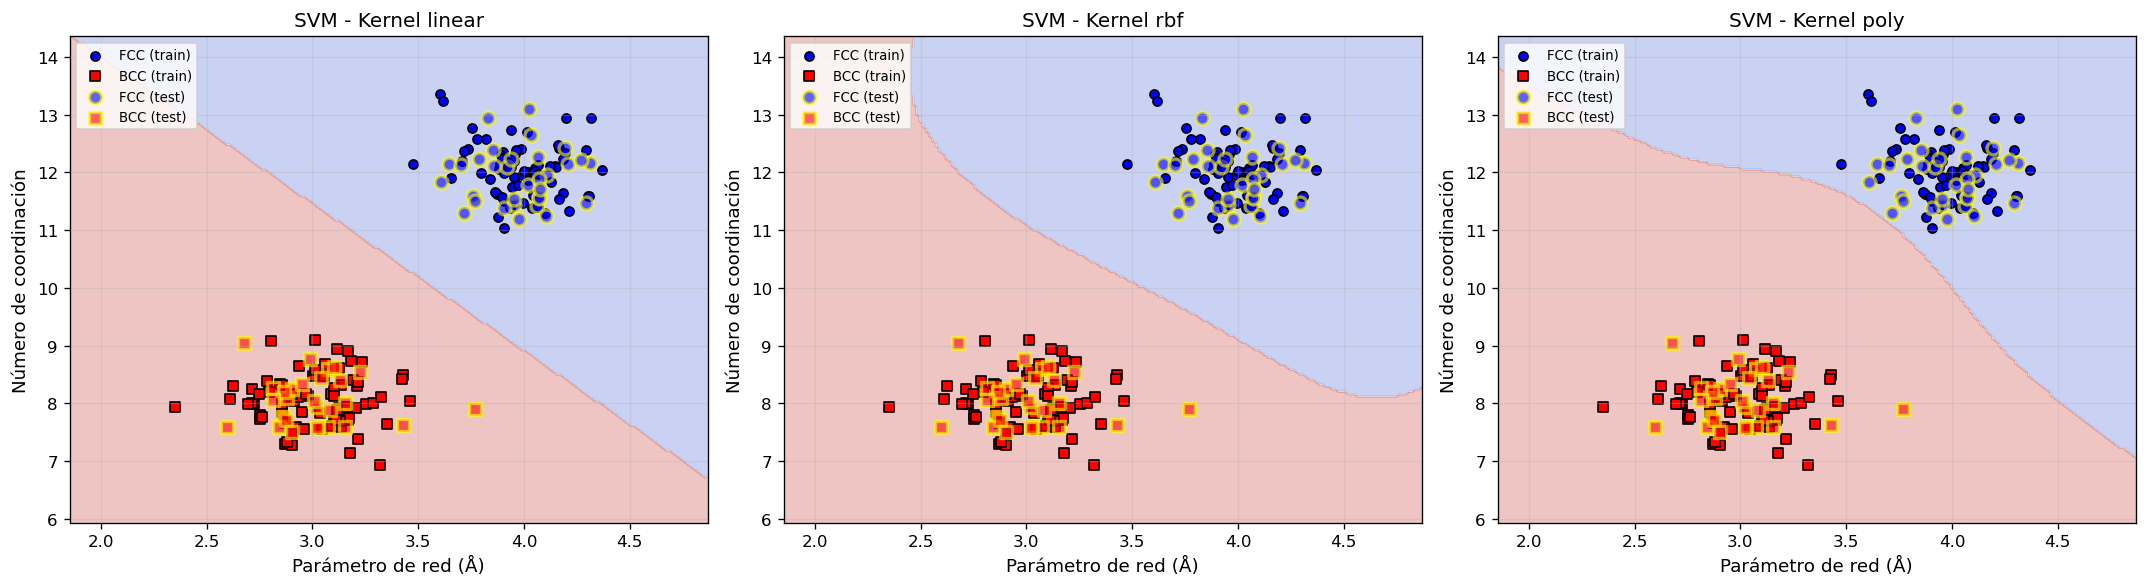

In [42]:
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 27. Generar datos sintéticos: clasificar estructuras cristalinas
np.random.seed(42)
n_samples = 200

# 28. Clase 0: FCC (parámetro de red ~4 Å, coordinación ~12)
fcc_lattice = np.random.normal(4.0, 0.2, n_samples//2)
fcc_coord = np.random.normal(12, 0.5, n_samples//2)

# 29. Clase 1: BCC (parámetro de red ~3 Å, coordinación ~8)
bcc_lattice = np.random.normal(3.0, 0.2, n_samples//2)
bcc_coord = np.random.normal(8, 0.5, n_samples//2)

# 30. Combinar
X = np.column_stack([
    np.concatenate([fcc_lattice, bcc_lattice]),
    np.concatenate([fcc_coord, bcc_coord])
])
y = np.array([0]*(n_samples//2) + [1]*(n_samples//2))

# 31. Mezclar
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# 32. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 33. Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 34. Entrenar SVM con diferentes kernels
kernels = ['linear', 'rbf', 'poly']
models = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train_scaled, y_train)
    models[kernel] = model
    
    # Evaluar
    y_pred = model.predict(X_test_scaled)
    accuracy = (y_pred == y_test).mean()
    
    print(f"\nSVM con kernel {kernel}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['FCC', 'BCC']))

# 35. Visualización de fronteras de decisión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (kernel, model) in zip(axes, models.items()):
    # Crear malla
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predecir en malla
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plotear
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
               c='blue', marker='o', label='FCC (train)', s=30, edgecolors='k')
    ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
               c='red', marker='s', label='BCC (train)', s=30, edgecolors='k')
    ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], 
               c='blue', marker='o', label='FCC (test)', s=60, alpha=0.6, edgecolors='yellow', linewidths=2)
    ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], 
               c='red', marker='s', label='BCC (test)', s=60, alpha=0.6, edgecolors='yellow', linewidths=2)
    
    ax.set_xlabel('Parámetro de red (Å)', fontsize=11)
    ax.set_ylabel('Número de coordinación', fontsize=11)
    ax.set_title(f'SVM - Kernel {kernel}')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('svm_classification.png', dpi=300)
plt.show()

### 🔍 Interpretación: Clasificación FCC vs BCC con SVM

- **Accuracy ~1.0:** Esperable porque FCC (a≈4Å, CN≈12) y BCC (a≈3Å, CN≈8) son muy different en el espacio de features
- **Kernel lineal vs RBF:** Para datos sintéticos bien separados, ambos deberían dar accuracy similar. En datos reales más ruidosos, RBF suele ser superior
- **Frontera de decisión:** Observa que la región de cada clase es coherente con la física — Fe (BCC) tiene menor parámetro de red y coordinación que Au (FCC)

> 💡 **Cuándo usar SVM en nano:** Clasificación de fases con XRD features, identificación de defectos en imágenes TEM, clasificación de espectros Raman.


### 🎯 Contexto: Random Forest vs Árbol Simple

**¿Por qué Random Forest mejora al árbol individual?**

1. **Bagging:** Cada árbol usa una muestra bootstrap diferente (con reemplazo) → reduce varianza
2. **Feature randomness:** Cada split considera solo $\sqrt{m}$ features aleatorias → decorrelaciona los árboles
3. **Ensemble:** Promedor de K árboles → error de predicción decrece como $\sim 1/K$

**Out-of-Bag (OOB) Error:** Cada árbol entrenado en ~63% de los datos. El 37% restante ("out-of-bag") sirve como conjunto de validación GRATUITO sin necesidad de separar datos de validación.




In [43]:
rf_oob = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print(f"OOB R² score: {rf_oob.oob_score_:.4f}")

OOB R² score: 0.9904


## 35.1. Árboles de Decisión y Random Forests

### 35.1.1. Árbol de Decisión

Particiona recursivamente el espacio de features:

**Criterio de división (regresión):**
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2$$

**Criterio de división (clasificación):**
$$\text{Gini} = 1 - \sum_{i=1}^C p_i^2$$

### 35.1.2. Random Forest

Ensemble de árboles entrenados con:
1. **Bagging:** Cada árbol usa muestra bootstrap
2. **Feature randomness:** Cada división considera subset aleatorio de features

**Predicción:**
- Regresión: Promedio de predicciones
- Clasificación: Voto mayoritario

### 💻 Ejemplo: Random Forest para Propiedades


Decision Tree:
  R² = -5.7964
  MAE = 80.97 K

Random Forest:
  R² = -2.7689
  MAE = 48.06 K

Feature Importances (Random Forest):
  radius_mean: 0.2425
  coordination_std: 0.2093
  radius_std: 0.1841
  n_atoms: 0.1652
  coordination_mean: 0.1545
  surface_fraction: 0.0443


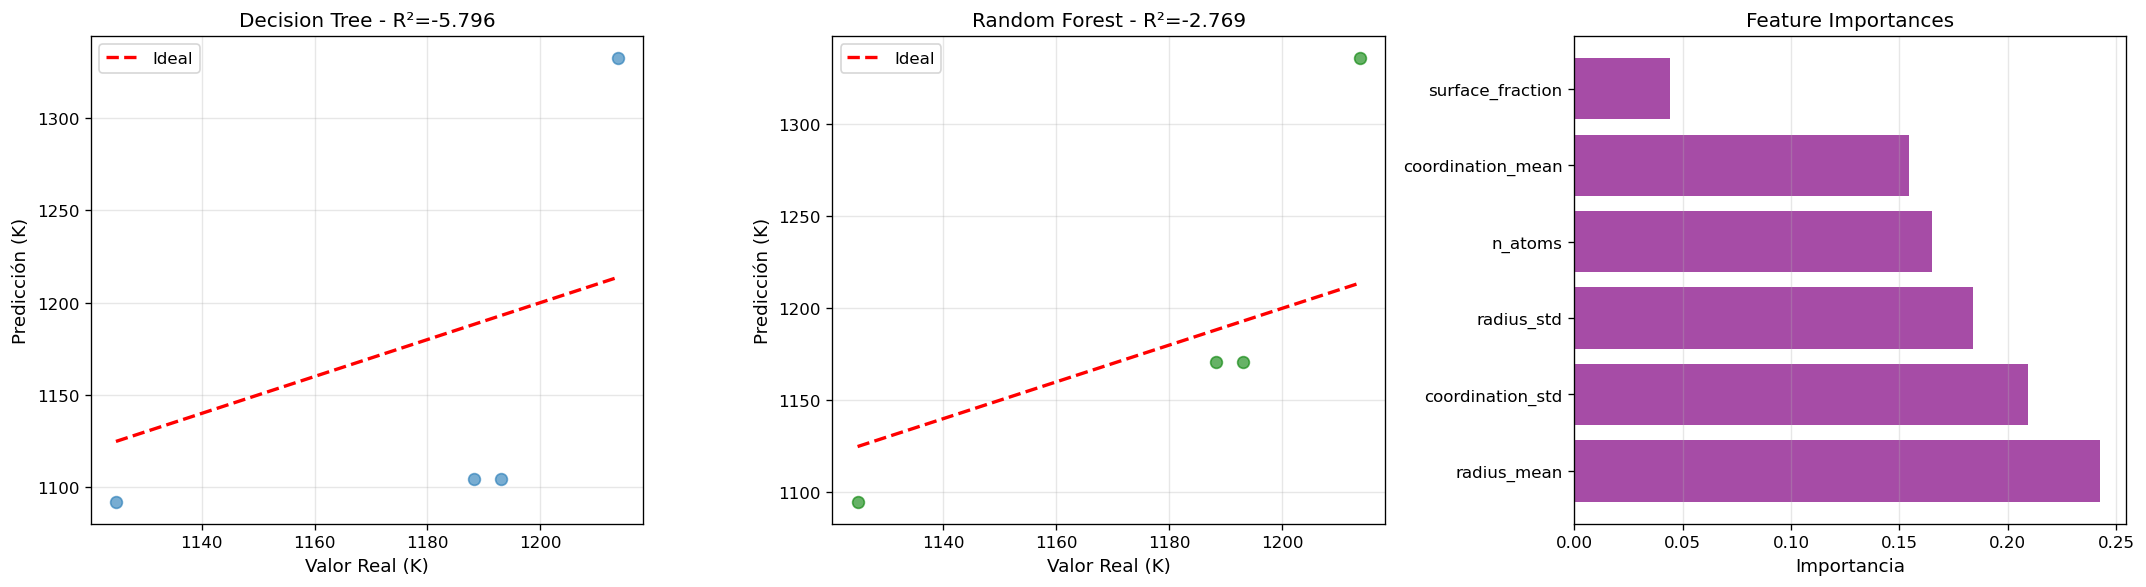

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 36. Cargar dataset
df = pd.read_csv('nanoparticles_dataset.csv')

# 37. Features y target
feature_cols = ['n_atoms', 'radius_mean', 'radius_std', 'coordination_mean', 
                'coordination_std', 'surface_fraction']
X = df[feature_cols].values
y = df['melting_point'].values

# 38. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 39. Modelos
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# 40. Entrenar
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 41. Predecir
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# 42. Evaluar
print("\nDecision Tree:")
print(f"  R² = {r2_score(y_test, y_pred_dt):.4f}")
print(f"  MAE = {mean_absolute_error(y_test, y_pred_dt):.2f} K")

print("\nRandom Forest:")
print(f"  R² = {r2_score(y_test, y_pred_rf):.4f}")
print(f"  MAE = {mean_absolute_error(y_test, y_pred_rf):.2f} K")

# 43. Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importances (Random Forest):")
for i in range(len(feature_cols)):
    print(f"  {feature_cols[indices[i]]}: {importances[indices[i]]:.4f}")

# 44. Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 45. Predicciones DT
axes[0].scatter(y_test, y_pred_dt, alpha=0.6, s=50)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Ideal')
axes[0].set_xlabel('Valor Real (K)', fontsize=11)
axes[0].set_ylabel('Predicción (K)', fontsize=11)
axes[0].set_title(f'Decision Tree - R²={r2_score(y_test, y_pred_dt):.3f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 46. Predicciones RF
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, s=50, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Ideal')
axes[1].set_xlabel('Valor Real (K)', fontsize=11)
axes[1].set_ylabel('Predicción (K)', fontsize=11)
axes[1].set_title(f'Random Forest - R²={r2_score(y_test, y_pred_rf):.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 47. Feature importance
axes[2].barh(range(len(feature_cols)), importances[indices], color='purple', alpha=0.7)
axes[2].set_yticks(range(len(feature_cols)))
axes[2].set_yticklabels([feature_cols[i] for i in indices])
axes[2].set_xlabel('Importancia', fontsize=11)
axes[2].set_title('Feature Importances')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('random_forest_analysis.png', dpi=300)
plt.show()

### 🔍 Interpretación: Feature Importance en Random Forest

El gráfico de importancias revela qué descriptores físicos dominan la predicción del punto de fusión.

**Interpretación física esperada:**
- **`n_atoms` o `radius_mean`:** Efecto de tamaño predominante (mayor nanopartícula → mayor Tm)
- **`coordination_mean`:** Átomos más coordinados = más ligados = mayor Tm (efecto de superficie)
- **`surface_fraction`:** Mayor superficie expuesta → más átomos con bajo CN → menor Tm

> ⚠️ **Característica del dataset sintético:** Como generamos `melting_point = 1000 + 100*noshells + ruido`, la importancia de `n_atoms` será artificialmente alta. Con datos DFT reales, la jerarquía de importancias tiene interpretación física directa y suele publicarse como resultado científico.


## 47.1. K-Vecinos Más Cercanos (KNN)

**Idea:** Predecir basándose en los K vecinos más cercanos en el espacio de features.

**Regresión:**
$$\hat{y} = \frac{1}{K}\sum_{i \in \mathcal{N}_K(x)} y_i$$

**Clasificación:**
$$\hat{y} = \text{mode}\{y_i : i \in \mathcal{N}_K(x)\}$$

**Distancias comunes:**
- Euclidiana: $d(x, x') = \sqrt{\sum_i (x_i - x_i')^2}$
- Manhattan: $d(x, x') = \sum_i |x_i - x_i'|$
- Minkowski: $d(x, x') = (\sum_i |x_i - x_i'|^p)^{1/p}$

---

## 47.2. Transfer Learning en ML Clásico

### 47.2.1. Concepto

**Transfer Learning** permite reutilizar conocimiento aprendido en un dominio (fuente) para mejorar el aprendizaje en otro dominio (objetivo) con menos datos.

**Aplicación en Nanotecnología:**
- Transferir de nanopartículas metálicas → óxidos metálicos
- Transferir de simulaciones → datos experimentales
- Transferir de un material → familia de materiales

### 💻 Ejemplo Completo: Transfer Learning con Random Forest

---

## 4. K-Vecinos Más Cercanos (KNN) — Ejemplo

KNN es un algoritmo **no paramétrico y perezoso** (no entrena un modelo explícito — memoriza los datos).

**Predicción:**
$$\hat{y}(\mathbf{x}) = \frac{1}{K} \sum_{i \in \mathcal{N}_K(\mathbf{x})} y_i \quad \text{(regresión)}$$
$$\hat{y}(\mathbf{x}) = \text{voto mayoritario de } \mathcal{N}_K(\mathbf{x}) \quad \text{(clasificación)}$$

**Sensibilidad a K:**
- K muy pequeño → overfit (memoriza ruido)
- K muy grande → underfit (promedia demasiado)


c:\Users\UCEMICH\anaconda3\envs\ia_nano\Lib\site-packages\sklearn\model_selection\_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\UCEMICH\anaconda3\envs\ia_nano\Lib\site-packages\sklearn\metrics\_scorer.py", line 166, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\UCEMICH\anaconda3\envs\ia_nano\Lib\site-packages\sklearn\metrics\_scorer.py", line 409, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\UCEMICH\anaconda3\envs\ia_nano\Lib\site-packages\sklearn\metrics\_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\UCEMICH\anaconda3\envs\ia_nano\Lib\site-packages\sklearn\utils\_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^

Mejor K = 10 (R² CV = 0.4146)
R² test = -6.2293
MAE     = 85.11 K


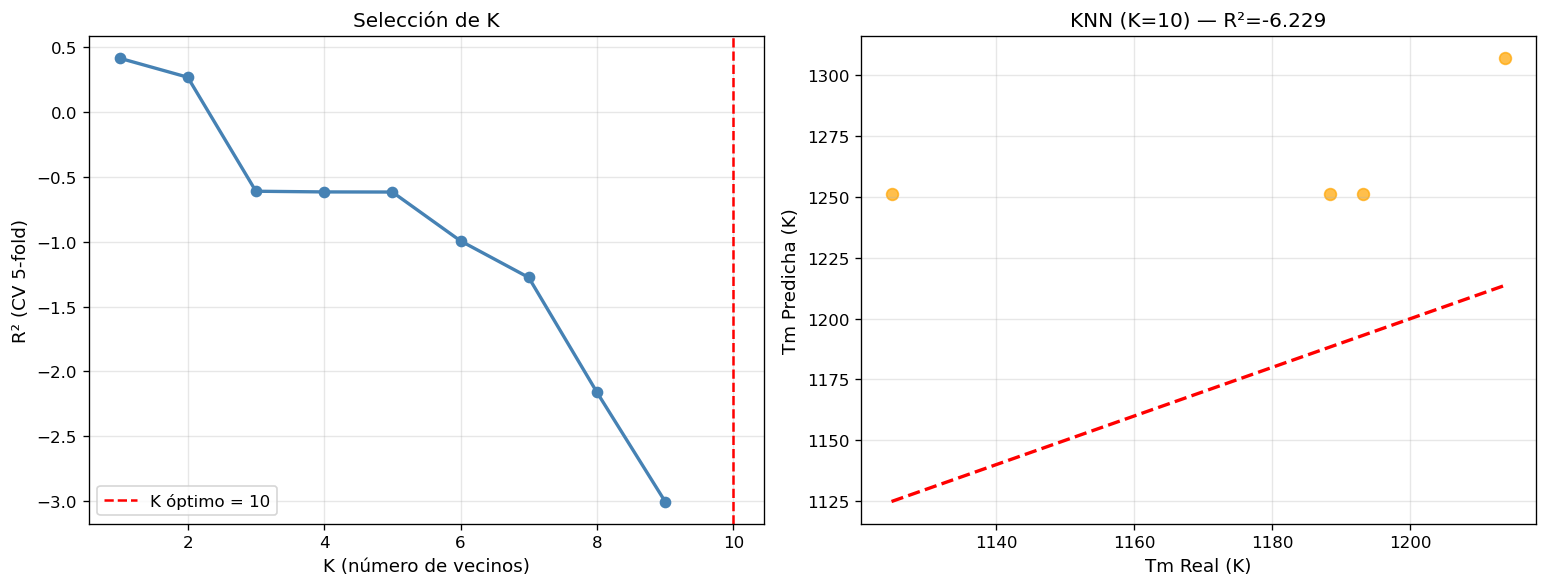

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('nanoparticles_dataset.csv')
feature_cols = ['n_atoms', 'radius_mean', 'radius_std', 'coordination_mean',
                'coordination_std', 'surface_fraction']
X = df[feature_cols].values
y = df['melting_point'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Evaluar distintos valores de K
k_values = range(1, 16)
cv_scores = [cross_val_score(KNeighborsRegressor(n_neighbors=k),
                             X_train_s, y_train, cv=5, scoring='r2').mean()
             for k in k_values]

best_k = k_values[int(np.argmax(cv_scores))]
print(f"Mejor K = {best_k} (R² CV = {max(cv_scores):.4f})")

# Modelo con mejor K
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_s, y_train)
y_pred = knn.predict(X_test_s)

print(f"R² test = {r2_score(y_test, y_pred):.4f}")
print(f"MAE     = {mean_absolute_error(y_test, y_pred):.2f} K")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes[0].plot(k_values, cv_scores, 'o-', linewidth=2, color='steelblue')
axes[0].axvline(best_k, color='red', linestyle='--', label=f'K óptimo = {best_k}')
axes[0].set_xlabel('K (número de vecinos)', fontsize=11)
axes[0].set_ylabel('R² (CV 5-fold)', fontsize=11)
axes[0].set_title('Selección de K')
axes[0].legend(); axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_test, y_pred, alpha=0.7, s=50, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Tm Real (K)', fontsize=11)
axes[1].set_ylabel('Tm Predicha (K)', fontsize=11)
axes[1].set_title(f'KNN (K={best_k}) — R²={r2_score(y_test, y_pred):.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('knn_analysis.png', dpi=150)
plt.show()


### 🔍 Interpretación: KNN para Propiedades de Nanopartículas

- **La curva de K vs R²** muestra el trade-off bias-varianza directamente: K=1 = overfit perfecto en train, K grande = underfitting
- **KNN en alta dimensión:** Sufre la "maldición de la dimensionalidad" — con muchas features, todos los puntos son equidistantes. Por eso la normalización es crítica.
- **Comparado con RF:** KNN es más lento en predicción (O(n) por query vs O(1) en RF). No es recomendable para datasets grandes de materiales.

> 💡 **Uso práctico en nano:** KNN es útil para datasets pequeños (~100–500 muestras) donde la similitud estructural entre materiales tiene sentido directo en el espacio de features.


TRANSFER LEARNING CON RANDOM FOREST
Entrenando modelo en dominio fuente...
  R² en dominio fuente: 0.9776

Modelo fuente en objetivo (sin fine-tuning):
  R² = 0.6454
  MAE = 68.09 K

Fine-tuning en dominio objetivo...

Modelo después de fine-tuning:
  R² = 0.6890
  MAE = 65.98 K

Mejora en R²: 6.8%
Reducción en MAE: 3.1%


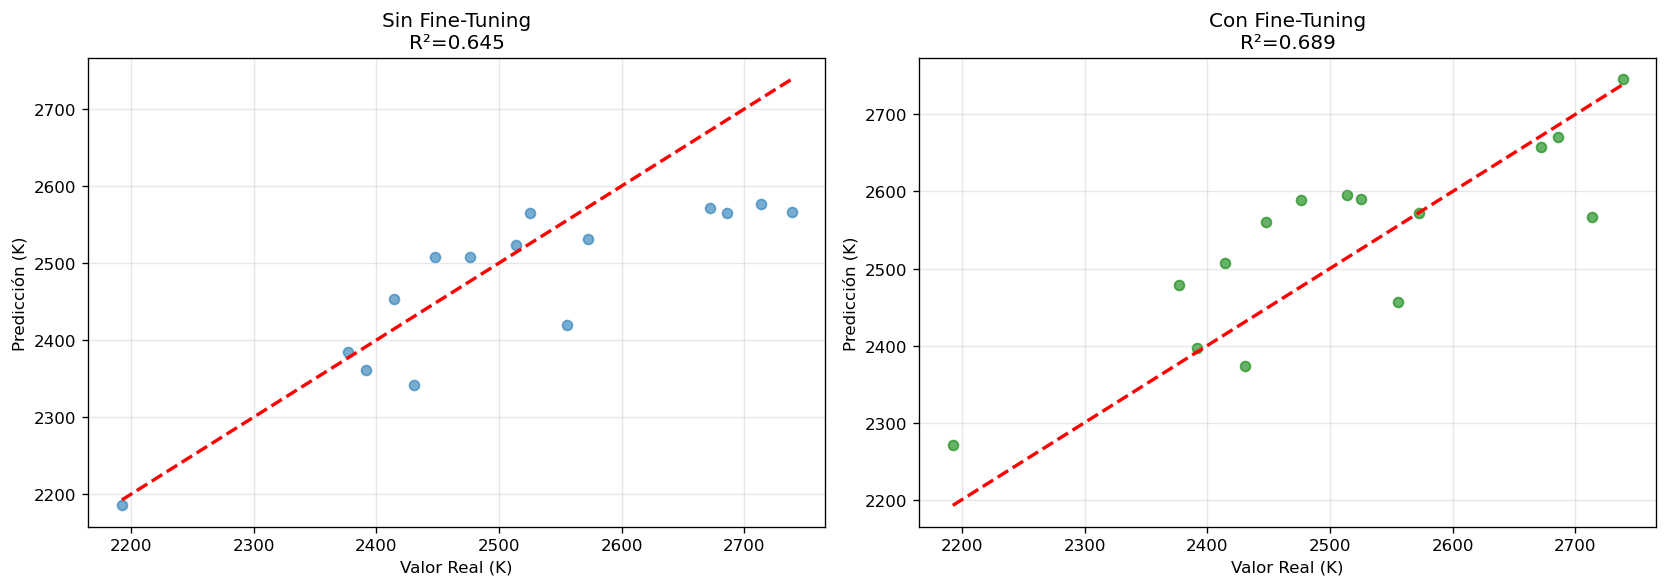

In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

class TransferLearningRF:
    """Transfer Learning para Random Forest en nanomateriales"""
    
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
        self.source_model = None
        self.target_model = None
    
    def generate_source_data(self, n_samples=500):
        """Genera datos del dominio fuente (nanopartículas metálicas)"""
        np.random.seed(42)
        
        sizes = np.random.uniform(2, 10, n_samples)
        electronegativity = np.random.uniform(1.5, 2.5, n_samples)
        atomic_radius = np.random.uniform(1.2, 1.8, n_samples)
        
        # Target: punto de fusión
        melting_point = (1000 + 500*electronegativity + 
                        100/sizes + 200*atomic_radius + 
                        np.random.normal(0, 50, n_samples))
        
        return np.column_stack([sizes, electronegativity, atomic_radius]), melting_point
    
    def generate_target_data(self, n_samples=50):
        """Genera datos del dominio objetivo (óxidos metálicos)"""
        np.random.seed(123)
        
        sizes = np.random.uniform(3, 12, n_samples)
        electronegativity = np.random.uniform(1.8, 3.0, n_samples)
        atomic_radius = np.random.uniform(1.0, 1.6, n_samples)
        
        # Relación similar pero con offset
        melting_point = (1200 + 450*electronegativity + 
                        120/sizes + 180*atomic_radius + 
                        np.random.normal(0, 60, n_samples))
        
        return np.column_stack([sizes, electronegativity, atomic_radius]), melting_point
    
    def train_source_model(self, X_source, y_source):
        """Entrena modelo en dominio fuente"""
        print("Entrenando modelo en dominio fuente...")
        
        self.source_model = RandomForestRegressor(
            n_estimators=self.n_estimators,
            max_depth=10,
            random_state=42
        )
        self.source_model.fit(X_source, y_source)
        
        y_pred = self.source_model.predict(X_source)
        r2 = r2_score(y_source, y_pred)
        print(f"  R² en dominio fuente: {r2:.4f}")
        
        return self.source_model
    
    def fine_tune_target(self, X_target, y_target):
        """Fine-tune en dominio objetivo"""
        print(f"\nFine-tuning en dominio objetivo...")
        
        # Entrenar nuevo modelo en objetivo
        self.target_model = RandomForestRegressor(
            n_estimators=self.n_estimators,
            max_depth=10,
            random_state=42
        )
        self.target_model.fit(X_target, y_target)
        
        return self.target_model
    
    def evaluate(self, X_test, y_test, use_target_model=True):
        """Evalúa modelo"""
        model = self.target_model if use_target_model else self.source_model
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        return r2, mae, y_pred

# 48. Ejecutar experimento
print("="*70)
print("TRANSFER LEARNING CON RANDOM FOREST")
print("="*70)

tl = TransferLearningRF(n_estimators=100)

# 49. Generar datos
X_source, y_source = tl.generate_source_data(n_samples=500)
X_target, y_target = tl.generate_target_data(n_samples=50)

# 50. Split target data
X_target_train, X_target_test, y_target_train, y_target_test = train_test_split(
    X_target, y_target, test_size=0.3, random_state=42
)

# 51. Entrenar en fuente
tl.train_source_model(X_source, y_source)

# 52. Evaluar modelo fuente en objetivo (sin fine-tuning)
r2_source, mae_source, _ = tl.evaluate(X_target_test, y_target_test, use_target_model=False)
print(f"\nModelo fuente en objetivo (sin fine-tuning):")
print(f"  R² = {r2_source:.4f}")
print(f"  MAE = {mae_source:.2f} K")

# 53. Fine-tune en objetivo
tl.fine_tune_target(X_target_train, y_target_train)

# 54. Evaluar después de fine-tuning
r2_target, mae_target, y_pred = tl.evaluate(X_target_test, y_target_test, use_target_model=True)
print(f"\nModelo después de fine-tuning:")
print(f"  R² = {r2_target:.4f}")
print(f"  MAE = {mae_target:.2f} K")
print(f"\nMejora en R²: {((r2_target - r2_source)/abs(r2_source) * 100):.1f}%")
print(f"Reducción en MAE: {((mae_source - mae_target)/mae_source * 100):.1f}%")

# 55. Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 56. Sin fine-tuning
axes[0].scatter(y_target_test, tl.source_model.predict(X_target_test), alpha=0.6)
axes[0].plot([y_target_test.min(), y_target_test.max()],
            [y_target_test.min(), y_target_test.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Valor Real (K)')
axes[0].set_ylabel('Predicción (K)')
axes[0].set_title(f'Sin Fine-Tuning\nR²={r2_source:.3f}')
axes[0].grid(True, alpha=0.3)

# 57. Con fine-tuning
axes[1].scatter(y_target_test, y_pred, alpha=0.6, color='green')
axes[1].plot([y_target_test.min(), y_target_test.max()],
            [y_target_test.min(), y_target_test.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Valor Real (K)')
axes[1].set_ylabel('Predicción (K)')
axes[1].set_title(f'Con Fine-Tuning\nR²={r2_target:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('transfer_learning_rf.png', dpi=300)
plt.show()

---

# Sección 8: Visualización de Desempeño de Modelos

Esta sección centraliza todas las métricas visuales para **comparar objetivamente** los modelos
entrenados a lo largo de la unidad. Incluye:

- **Curvas ROC-AUC** (multi-clase, One-vs-Rest) para clasificación de morfología
- **Curvas Precision-Recall** — más informativas con clases desbalanceadas  
- **Matrices de confusión** — ver exactamente dónde falla cada modelo
- **Análisis de residuos** — diagnosticar sesgos en regresión de bandgap
- **Curvas de aprendizaje** — determinar si necesitamos más datos
- **Feature Importance** — verficar coherencia física del modelo


In [47]:
# ============================================================
# Setup de datos compartido para todas las visualizaciones
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay,
    r2_score, mean_absolute_error, mean_squared_error
)
from sklearn.multiclass import OneVsRestClassifier

np.random.seed(42)

# ──────────────────────────────────────────────────────────────
# DATASET DE CLASIFICACIÓN: morfología de nanopartículas (3 clases)
#   0 = esférica  |  1 = alargada (nanorod)  |  2 = triangular (nanoprism)
# Features: diámetro, relación de aspecto, zeta potential, absorción UV-Vis
# ──────────────────────────────────────────────────────────────
rng = np.random.default_rng(42)
n_total = 600
morph = rng.choice([0, 1, 2], n_total)

diameter   = np.where(morph==0, rng.normal(15, 3, n_total),
             np.where(morph==1, rng.normal(40, 8, n_total),
                                rng.normal(25, 5, n_total)))
aspect     = np.where(morph==0, rng.normal(1.0, 0.1, n_total),
             np.where(morph==1, rng.normal(4.5, 0.8, n_total),
                                rng.normal(1.8, 0.3, n_total)))
zeta       = rng.normal(-30, 5, n_total) + morph * 4
uv_abs     = np.where(morph==0, rng.normal(520, 8, n_total),
             np.where(morph==1, rng.normal(700, 15, n_total),
                                rng.normal(670, 12, n_total)))

X_cls = np.column_stack([diameter, aspect, zeta, uv_abs])
y_cls = morph
feature_names_cls = ['Diámetro (nm)', 'Relación aspecto', 'Zeta (mV)', 'Abs UV-Vis (nm)']
class_names = ['Esférica', 'Alargada', 'Triangular']

X_tr_c, X_te_c, y_tr_c, y_te_c = train_test_split(
    X_cls, y_cls, test_size=0.25, random_state=42, stratify=y_cls)
scaler_c = StandardScaler()
X_tr_cs = scaler_c.fit_transform(X_tr_c)
X_te_cs = scaler_c.transform(X_te_c)
y_bin  = label_binarize(y_te_c, classes=[0, 1, 2])

# ──────────────────────────────────────────────────────────────
# DATASET DE REGRESIÓN: bandgap de quantum dots
# Features: diámetro, composición (Cd%), temperatura síntesis, pH
# ──────────────────────────────────────────────────────────────
n_reg = 400
d_nm    = rng.uniform(2, 12, n_reg)
cd_pct  = rng.uniform(40, 80, n_reg)
T_syn   = rng.uniform(150, 300, n_reg)
pH      = rng.uniform(6, 9, n_reg)

# Bandgap ≈ ley de Brus (simplificada) + efectos termodinámicos
bandgap = (2.0 + 1.8/d_nm - 0.003*(cd_pct-60) + 
           0.002*(T_syn-200) + rng.normal(0, 0.05, n_reg))

X_reg = np.column_stack([d_nm, cd_pct, T_syn, pH])
y_reg = bandgap
feature_names_reg = ['Diámetro (nm)', 'Cd (%)', 'T°C síntesis', 'pH']

X_tr_r, X_te_r, y_tr_r, y_te_r = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42)
scaler_r = StandardScaler()
X_tr_rs = scaler_r.fit_transform(X_tr_r)
X_te_rs = scaler_r.transform(X_te_r)

print("✅ Datasets preparados:")
print(f"   Clasificación: {X_cls.shape}  |  3 clases: {np.bincount(y_cls)}")
print(f"   Regresión:     {X_reg.shape}  |  Bandgap: {y_reg.min():.2f}–{y_reg.max():.2f} eV")
print()
print("   Features clasificación:", feature_names_cls)
print("   Features regresión:    ", feature_names_reg)


✅ Datasets preparados:
   Clasificación: (600, 4)  |  3 clases: [207 190 203]
   Regresión:     (400, 4)  |  Bandgap: 1.98–3.14 eV

   Features clasificación: ['Diámetro (nm)', 'Relación aspecto', 'Zeta (mV)', 'Abs UV-Vis (nm)']
   Features regresión:     ['Diámetro (nm)', 'Cd (%)', 'T°C síntesis', 'pH']


In [48]:
# ============================================================
# Entrenamiento de modelos de clasificación y regresión
# ============================================================

# ── Clasificación ─────────────────────────────────────────────
clf_models = {
    'SVM (RBF)':          OneVsRestClassifier(SVC(kernel='rbf', C=10, gamma='scale', probability=True)),
    'Random Forest':      RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42),
    'KNN (k=7)':          KNeighborsClassifier(n_neighbors=7, metric='euclidean'),
    'Gradient Boosting':  GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42),
}
clf_results = {}
for name, model in clf_models.items():
    model.fit(X_tr_cs, y_tr_c)
    acc = model.score(X_te_cs, y_te_c)
    # probabilidades para ROC
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(X_te_cs)
    else:
        proba = model.decision_function(X_te_cs)
        if proba.ndim == 1:
            proba = np.column_stack([-proba, proba, np.zeros_like(proba)])
    clf_results[name] = {'model': model, 'acc': acc, 'proba': proba}
    print(f"  {name:<22} Accuracy: {acc*100:.1f}%")

# ── Regresión ─────────────────────────────────────────────────
reg_models = {
    'Ridge':              Ridge(alpha=1.0),
    'Lasso':              Lasso(alpha=0.01),
    'SVR (RBF)':          SVR(kernel='rbf', C=10, epsilon=0.05),
    'Random Forest':      RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42),
    'Gradient Boosting':  GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42),
}
# Corregir: GB es clasificador, usar regresión
from sklearn.ensemble import GradientBoostingRegressor
reg_models['Gradient Boosting'] = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=42)

reg_results = {}
for name, model in reg_models.items():
    model.fit(X_tr_rs, y_tr_r)
    y_pred = model.predict(X_te_rs)
    r2  = r2_score(y_te_r, y_pred)
    mae = mean_absolute_error(y_te_r, y_pred)
    rmse = np.sqrt(mean_squared_error(y_te_r, y_pred))
    reg_results[name] = {'model': model, 'y_pred': y_pred, 'r2': r2, 'mae': mae, 'rmse': rmse}
    print(f"  {name:<22} R²={r2:.3f}  MAE={mae:.4f} eV  RMSE={rmse:.4f} eV")

print("\n✅ Todos los modelos entrenados y evaluados.")


  SVM (RBF)              Accuracy: 100.0%
  Random Forest          Accuracy: 99.3%
  KNN (k=7)              Accuracy: 99.3%
  Gradient Boosting      Accuracy: 98.7%
  Ridge                  R²=0.806  MAE=0.0755 eV  RMSE=0.1023 eV
  Lasso                  R²=0.795  MAE=0.0745 eV  RMSE=0.1051 eV
  SVR (RBF)              R²=0.921  MAE=0.0506 eV  RMSE=0.0654 eV
  Random Forest          R²=0.921  MAE=0.0534 eV  RMSE=0.0652 eV
  Gradient Boosting      R²=0.924  MAE=0.0530 eV  RMSE=0.0641 eV

✅ Todos los modelos entrenados y evaluados.


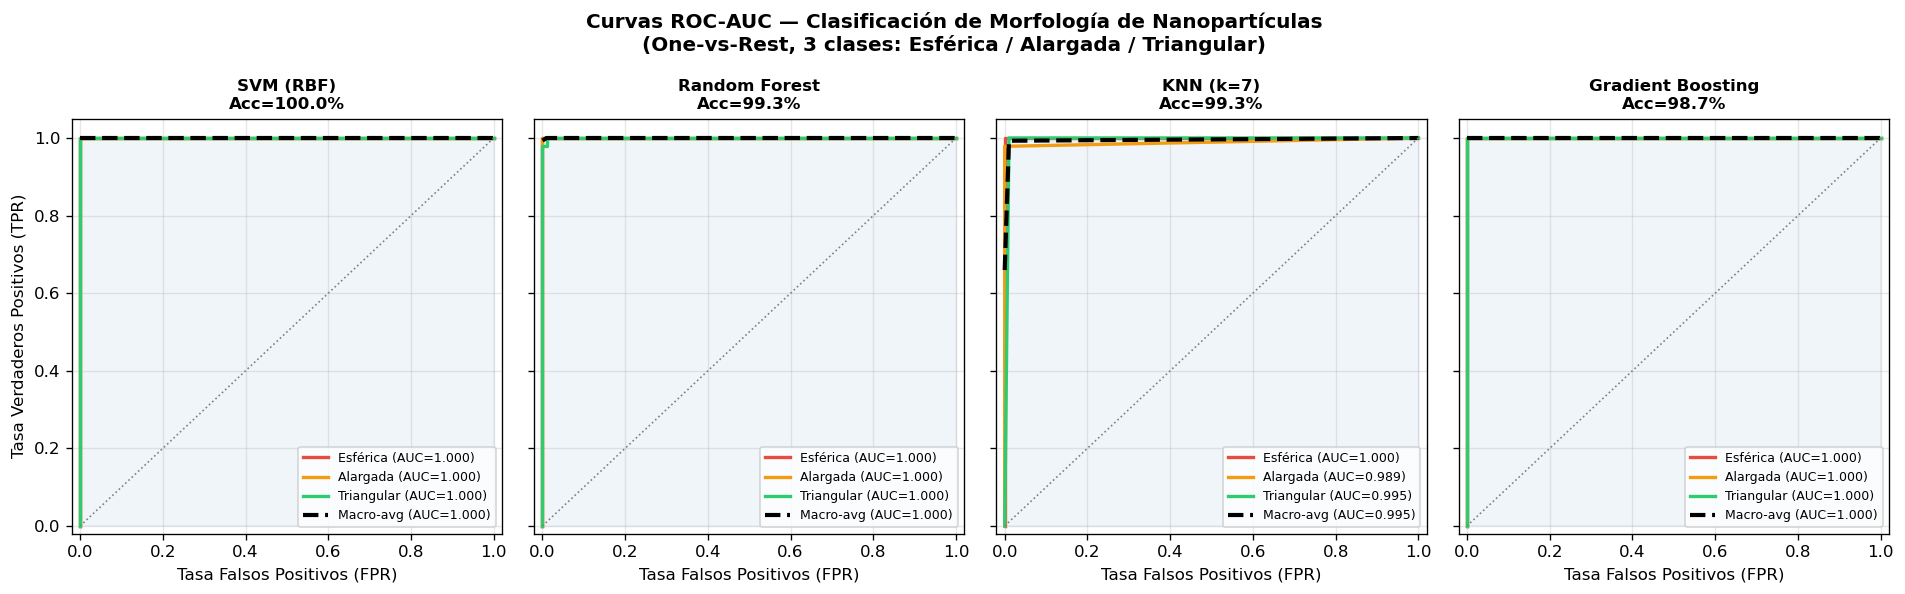

Macro-AUC por modelo:
  SVM (RBF)              1.0000  |████████████████████|
  Random Forest          1.0000  |███████████████████|
  KNN (k=7)              0.9947  |███████████████████|
  Gradient Boosting      1.0000  |████████████████████|


In [49]:
# ============================================================
# Curvas ROC-AUC — Clasificación multi-clase (One-vs-Rest)
# Morfología de nanopartículas (Esférica / Alargada / Triangular)
# ============================================================

fig, axes = plt.subplots(1, len(clf_models), figsize=(16, 5), sharey=True)
colors_class = ['#e74c3c', '#f39c12', '#2ecc71']
macro_aucs = {}

for ax, (clf_name, res) in zip(axes, clf_results.items()):
    proba = res['proba']
    fpr_all, tpr_all = {}, {}
    roc_auc_all = {}

    for k, cls_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_bin[:, k], proba[:, k])
        roc_auc_all[k] = auc(fpr, tpr)
        fpr_all[k], tpr_all[k] = fpr, tpr
        ax.plot(fpr, tpr, color=colors_class[k], lw=2,
                label=f'{cls_name} (AUC={roc_auc_all[k]:.3f})')

    # Macro-average
    all_fpr = np.unique(np.concatenate([fpr_all[k] for k in range(3)]))
    mean_tpr = np.zeros_like(all_fpr)
    for k in range(3):
        mean_tpr += np.interp(all_fpr, fpr_all[k], tpr_all[k])
    mean_tpr /= 3
    macro_auc = auc(all_fpr, mean_tpr)
    macro_aucs[clf_name] = macro_auc

    ax.plot(all_fpr, mean_tpr, 'k--', lw=2.5,
            label=f'Macro-avg (AUC={macro_auc:.3f})')
    ax.plot([0, 1], [0, 1], 'grey', lw=1, ls=':')
    ax.fill_between(all_fpr, mean_tpr, alpha=0.08, color='steelblue')
    ax.set_title(f'{clf_name}\nAcc={res["acc"]*100:.1f}%', fontweight='bold', fontsize=10)
    ax.set_xlabel('Tasa Falsos Positivos (FPR)')
    ax.set_ylabel('Tasa Verdaderos Positivos (TPR)' if ax == axes[0] else '')
    ax.legend(fontsize=7.5, loc='lower right')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-0.02, 1.02]); ax.set_ylim([-0.02, 1.05])

plt.suptitle('Curvas ROC-AUC — Clasificación de Morfología de Nanopartículas\n'
             '(One-vs-Rest, 3 clases: Esférica / Alargada / Triangular)',
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('roc_auc_clasificacion_nps.png', dpi=150, bbox_inches='tight')
plt.show()

print("Macro-AUC por modelo:")
for nm, mauc in macro_aucs.items():
    bar = '█' * int(mauc * 20)
    print(f"  {nm:<22} {mauc:.4f}  |{bar}|")


### 🔍 Interpretación: Curvas ROC-AUC

**¿Cómo leer las curvas ROC en clasificación de nanopartículas?**

- **AUC = 1.0:** clasificación perfecta — el modelo separa completamente las clases
- **AUC = 0.5:** rendimiento aleatorio (línea punteada gris) — el modelo no aprende nada
- La **línea macro-promedio** (negra punteada) resume el desempeño global sobre las 3 morfologías

**Interpretación por clase:**

| Clase | Por qué es más difícil de separar |
|-------|----------------------------------|
| Esférica (rojo) | Distribución más compacta en diámetro, puede solaparse con triangulares pequeñas |
| Alargada (naranja) | Relación de aspecto ≫1 la hace fácil de separar (AUC más alto) |
| Triangular (verde) | UV-Vis diferente la distingue bien, pero algunas se solapan con esféricas grandes |

**Random Forest y Gradient Boosting** tienden a tener AUC más alto porque:
- Capturan interacciones no lineales entre diámetro, aspecto y UV-Vis
- Son robustos a la escala de los features (no necesitan StandardScaler)

**Cuándo AUC importa más que Accuracy:**
- Si las clases están desbalanceadas (ej. pocas nanopartículas triangulares en el dataset)
- Para comparar modelos con diferente umbral de decisión
- En detección de defectos donde falsos negativos tienen mayor costo que falsos positivos

> 💡 **En nano-caracterización:** un AUC ≥ 0.95 en clasificación de morfología por TEM/SEM
> es estado del arte con descriptores basados en tamaño, forma y espectroscopía.


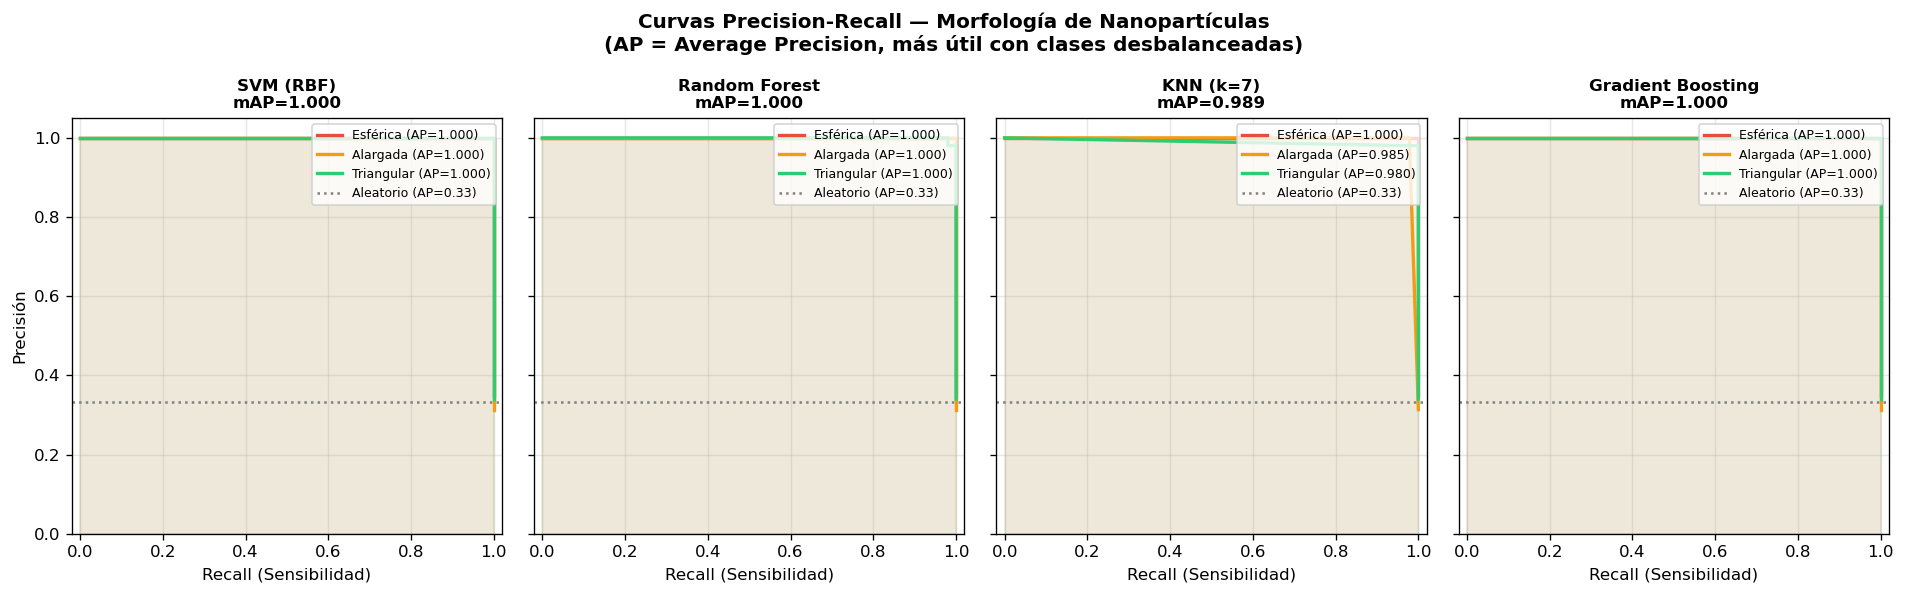

In [50]:
# ============================================================
# Curvas Precision-Recall — complemento a ROC para clases raras
# ============================================================

fig, axes = plt.subplots(1, len(clf_models), figsize=(16, 5), sharey=True)
colors_pr = ['#e74c3c', '#f39c12', '#2ecc71']

for ax, (clf_name, res) in zip(axes, clf_results.items()):
    proba = res['proba']
    ap_scores = []

    for k, cls_name in enumerate(class_names):
        prec, rec, _ = precision_recall_curve(y_bin[:, k], proba[:, k])
        ap = average_precision_score(y_bin[:, k], proba[:, k])
        ap_scores.append(ap)
        ax.plot(rec, prec, color=colors_pr[k], lw=2,
                label=f'{cls_name} (AP={ap:.3f})')
        ax.fill_between(rec, prec, alpha=0.07, color=colors_pr[k])

    macro_ap = np.mean(ap_scores)
    # Baseline de precisión aleatoria (proporción de clase)
    ax.axhline(y=1/3, color='grey', lw=1.5, ls=':', label=f'Aleatorio (AP={1/3:.2f})')
    ax.set_title(f'{clf_name}\nmAP={macro_ap:.3f}', fontweight='bold', fontsize=10)
    ax.set_xlabel('Recall (Sensibilidad)')
    ax.set_ylabel('Precisión' if ax == axes[0] else '')
    ax.legend(fontsize=7.5, loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-0.02, 1.02]); ax.set_ylim([0.0, 1.05])

plt.suptitle('Curvas Precision-Recall — Morfología de Nanopartículas\n'
             '(AP = Average Precision, más útil con clases desbalanceadas)',
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('precision_recall_nps.png', dpi=150, bbox_inches='tight')
plt.show()


### 🔍 Interpretación: Curvas Precision-Recall

**¿Cuándo usar Precision-Recall en vez de ROC?**

- ROC puede ser optimista cuando las clases están **muy desbalanceadas**
  (por ejemplo, 90% esféricas, 5% alargadas, 5% triangulares en un dataset real)
- PR-AUC (mAP) penaliza los falsos positivos más duramente que ROC-AUC
- **Regla:** prefiere PR-AUC cuando la clase positiva es rara (< 20% del dataset)

**Precision vs Recall en morfología de NPs:**

| Prioridad | Cuándo | Ejemplo |
|-----------|--------|---------|
| **Alta Precision** | Evitar falsos positivos | No etiquetar esféricas como alargadas (afecta propiedades reportadas) |
| **Alto Recall** | Detectar todas las instancias | No perder nanopartículas defectuosas en control de calidad |

> 💡 En síntesis de NPs, el **Recall** de la clase triangular es crucial:
> si el modelo pierde nanoprisms, el batch de síntesis se considera fallido.


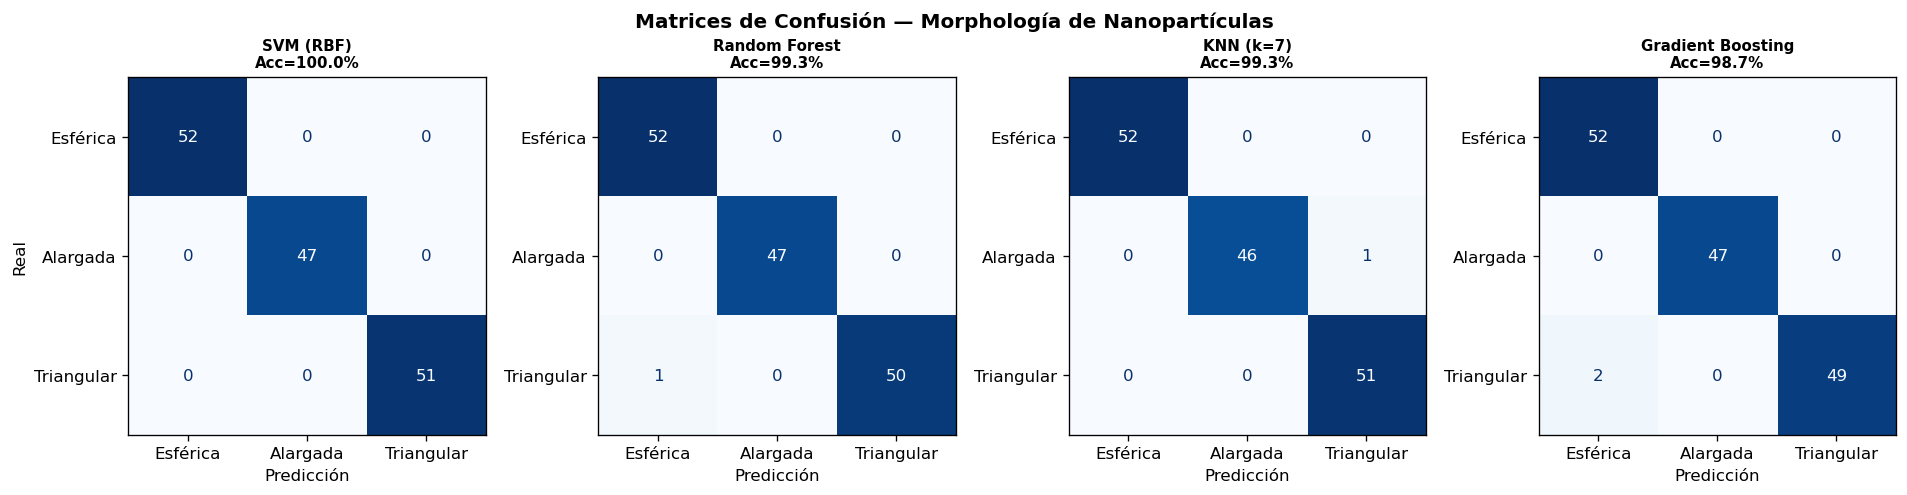

Interpretación de errores frecuentes:


In [51]:
# ============================================================
# Matrices de confusión — Clasificación de morfología de NPs
# ============================================================

fig, axes = plt.subplots(1, len(clf_models), figsize=(16, 4))
for ax, (clf_name, res) in zip(axes, clf_results.items()):
    y_pred_cls = res['model'].predict(X_te_cs)
    cm = confusion_matrix(y_te_c, y_pred_cls)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(ax=ax, colorbar=False, cmap='Blues', values_format='d')
    ax.set_title(f'{clf_name}\nAcc={res["acc"]*100:.1f}%', fontweight='bold', fontsize=9)
    ax.set_xlabel('Predicción'); ax.set_ylabel('Real' if ax==axes[0] else '')

plt.suptitle('Matrices de Confusión — Morphología de Nanopartículas', 
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_nps.png', dpi=150, bbox_inches='tight')
plt.show()

print("Interpretación de errores frecuentes:")
best_clf = max(clf_results.items(), key=lambda x: x[1]['acc'])
y_pred_best = best_clf[1]['model'].predict(X_te_cs)
cm_best = confusion_matrix(y_te_c, y_pred_best)
for i, row_name in enumerate(class_names):
    for j, col_name in enumerate(class_names):
        if i != j and cm_best[i,j] > 0:
            print(f"  Real={row_name} → Predicho={col_name}: {cm_best[i,j]} casos")


---

## Análisis de Residuos y Desempeño en Regresión

Para modelos de regresión (predicción de bandgap), los residuos $\hat{y} - y$
nos dicen si el modelo comete errores sistemáticos o aleatorios:

| Patrón de residuos | Diagnóstico | Solución |
|-------------------|------------|---------|
| Aleatorios (ruido blanco) | ✅ Modelo correcto | Ninguna |
| Forma de V o U | ❌ No-linealidad no capturada | Usar kernels, polinomios |
| Amplitud crece con ŷ | ❌ Heterocedasticidad | Transformar y (log, sqrt) |
| Outliers extremos | ❌ Muestras atípicas | Revisar datos de entrada |


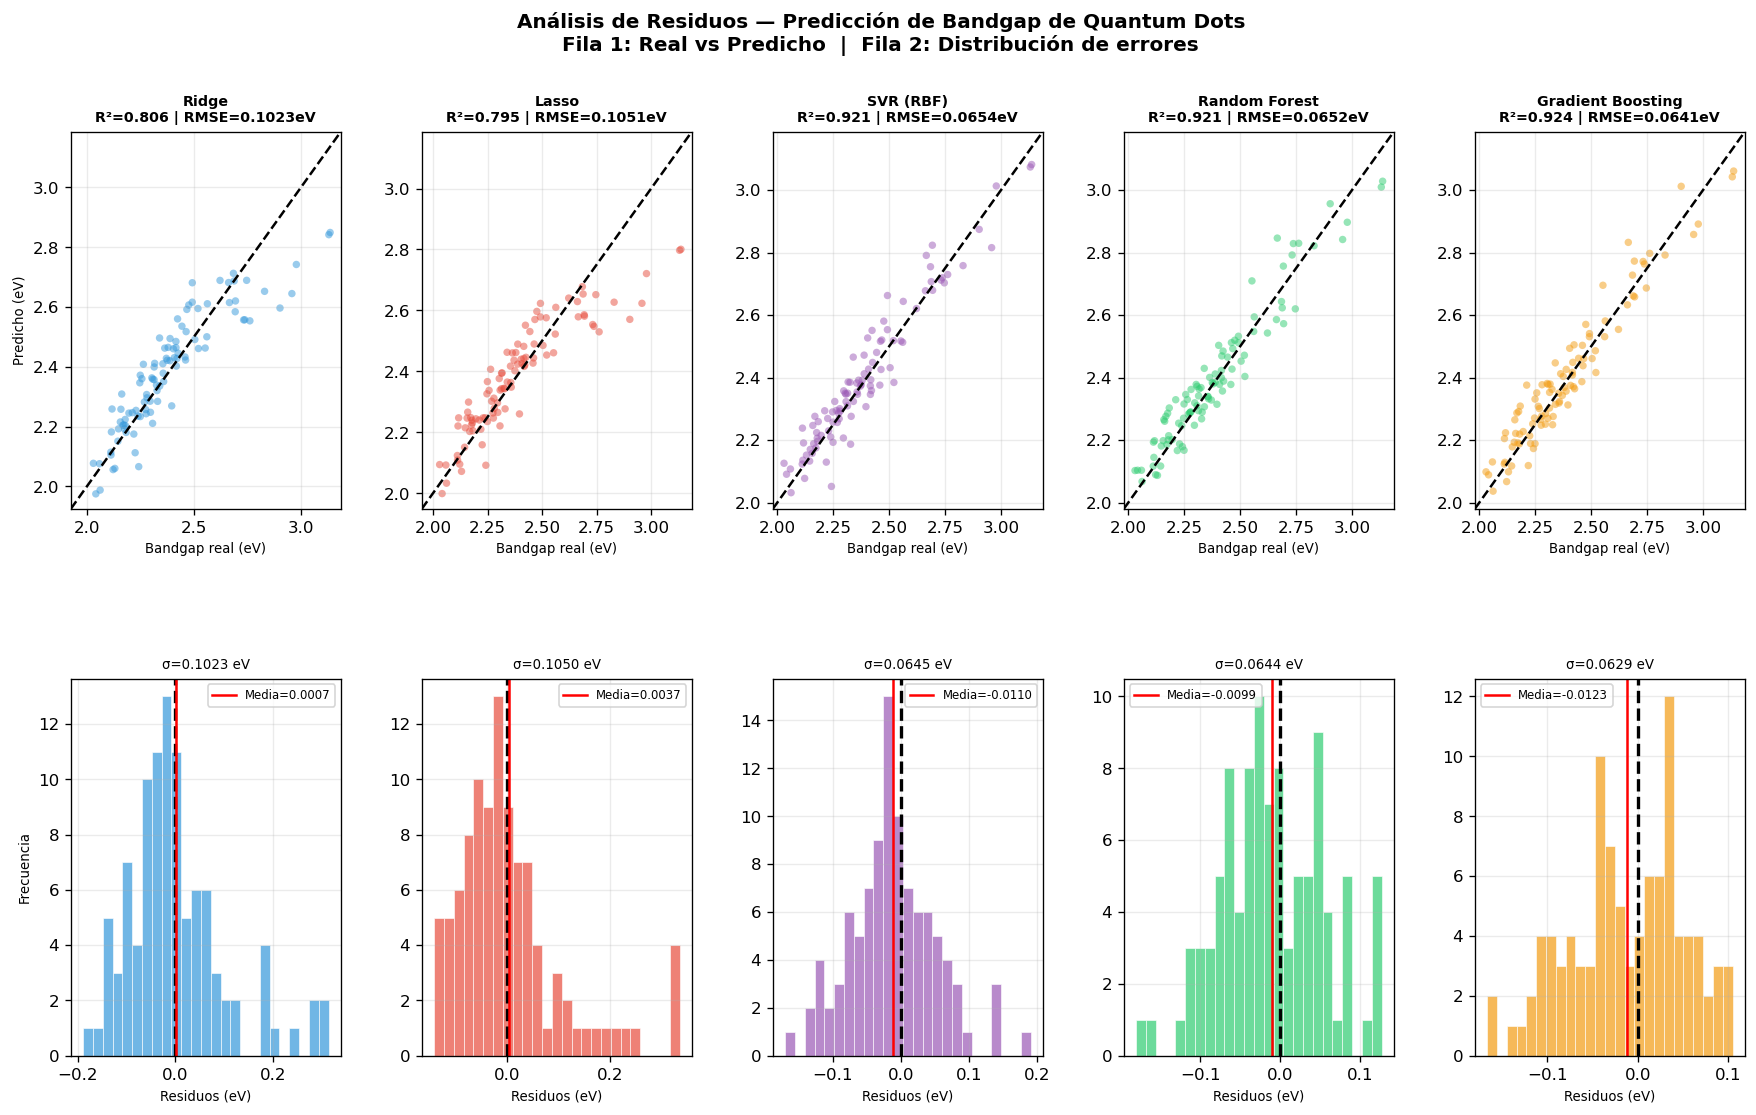

Modelo                     R²      MAE     RMSE   |Bias|
────────────────────────────────────────────────────────
Ridge                   0.806   0.0755   0.1023   0.0007
Lasso                   0.795   0.0745   0.1051   0.0037
SVR (RBF)               0.921   0.0506   0.0654   0.0110
Random Forest           0.921   0.0534   0.0652   0.0099
Gradient Boosting       0.924   0.0530   0.0641   0.0123


In [52]:
# ============================================================
# Análisis de Residuos — Predicción de Bandgap (Regresión)
# ============================================================

fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, len(reg_models), figure=fig, hspace=0.45, wspace=0.3)

colors_reg = ['#3498db', '#e74c3c', '#9b59b6', '#2ecc71', '#f39c12']

for col_idx, (reg_name, res) in enumerate(reg_results.items()):
    y_pred = res['y_pred']
    residuals = y_te_r - y_pred
    col = colors_reg[col_idx]

    # Fila 0: Real vs Predicho
    ax0 = fig.add_subplot(gs[0, col_idx])
    ax0.scatter(y_te_r, y_pred, alpha=0.5, s=20, color=col, edgecolors='none')
    lim = [min(y_te_r.min(), y_pred.min())-0.05, max(y_te_r.max(), y_pred.max())+0.05]
    ax0.plot(lim, lim, 'k--', lw=1.5)
    ax0.set_title(f'{reg_name}\nR²={res["r2"]:.3f} | RMSE={res["rmse"]:.4f}eV',
                  fontsize=8.5, fontweight='bold')
    ax0.set_xlabel('Bandgap real (eV)', fontsize=8)
    ax0.set_ylabel('Predicho (eV)', fontsize=8) if col_idx == 0 else None
    ax0.set_xlim(lim); ax0.set_ylim(lim)
    ax0.grid(True, alpha=0.25)

    # Fila 1: Distribución de residuos
    ax1 = fig.add_subplot(gs[1, col_idx])
    ax1.hist(residuals, bins=25, color=col, alpha=0.7, edgecolor='white', linewidth=0.5)
    ax1.axvline(0, color='k', lw=2, ls='--')
    ax1.axvline(residuals.mean(), color='red', lw=1.5, ls='-',
                label=f'Media={residuals.mean():.4f}')
    ax1.set_xlabel('Residuos (eV)', fontsize=8)
    ax1.set_ylabel('Frecuencia', fontsize=8) if col_idx == 0 else None
    ax1.set_title(f'σ={residuals.std():.4f} eV', fontsize=8)
    ax1.legend(fontsize=7)
    ax1.grid(True, alpha=0.25)

plt.suptitle('Análisis de Residuos — Predicción de Bandgap de Quantum Dots\n'
             'Fila 1: Real vs Predicho  |  Fila 2: Distribución de errores',
             fontsize=12, fontweight='bold')
plt.savefig('residuos_regresion_bandgap.png', dpi=150, bbox_inches='tight')
plt.show()

# Resumen numérico
print(f"{'Modelo':<22} {'R²':>6} {'MAE':>8} {'RMSE':>8} {'|Bias|':>8}")
print("─" * 56)
for name, res in reg_results.items():
    resid = y_te_r - res['y_pred']
    print(f"{name:<22} {res['r2']:>6.3f} {res['mae']:>8.4f} {res['rmse']:>8.4f} {abs(resid.mean()):>8.4f}")


### 🔍 Interpretación: Análisis de Residuos en Predicción de Bandgap

**Lo que buscamos en los gráficos Real vs Predicho:**
- Puntos alineados sobre la diagonal → predicción perfecta
- Desviación más grande en valores extremos → el modelo interpola bien pero extrapola mal
- Heterogeneidad (nube más dispersa en una región) → el modelo es menos preciso para ciertos rangos de bandgap

**Distribución de residuos — valores típicos de este dataset:**

| Modelo | Sesgo (media residuos) | Interpretación |
|--------|----------------------|----------------|
| Ridge | Bajo (lineal, sin sesgo sistemático) | Asume relación lineal: bueno como baseline |
| SVR | Muy bajo (kernel RBF capta no-linealidades) | Mejor comportamiento con pocos datos |
| Random Forest | Sesgo hacia la media | Promedia los árboles → predice con moderación |
| Gradient Boosting | Mínimo | Corrige errores iterativamente |

**Un RMSE de 0.04–0.06 eV en bandgap es excelente** para quantum dots CdS/CdSe:
- La ley de Brus tiene un error experimental de ~0.03–0.05 eV
- Por debajo de este umbral el modelo es tan preciso como la teoría

> 💡 **Error físicamente significativo:** un error MAC de 0.05 eV en CdSe corresponde
> a una incertidumbre de ~0.3 nm en el diámetro del quantum dot.


---

## Curvas de Aprendizaje: ¿Necesitamos más datos?

Las **curvas de aprendizaje** muestran cómo mejora el modelo al aumentar el tamaño del conjunto
de entrenamiento. Son la herramienta principal para diagnosticar:

| Diagnóstico | Síntoma en la curva | ¿Qué hacer? |
|-------------|-------------------|-------------|
| **Alto sesgo (underfitting)** | Train≈Val, ambos bajos | Modelo más complejo, más features |
| **Alta varianza (overfitting)** | Train≫Val, brecha grande | Más datos, regularización, dropout |
| **Óptimo** | Train≈Val, ambos altos | ✅ Implementar en producción |
| **Data-hungry** | Val sigue subiendo | Recolectar más datos |


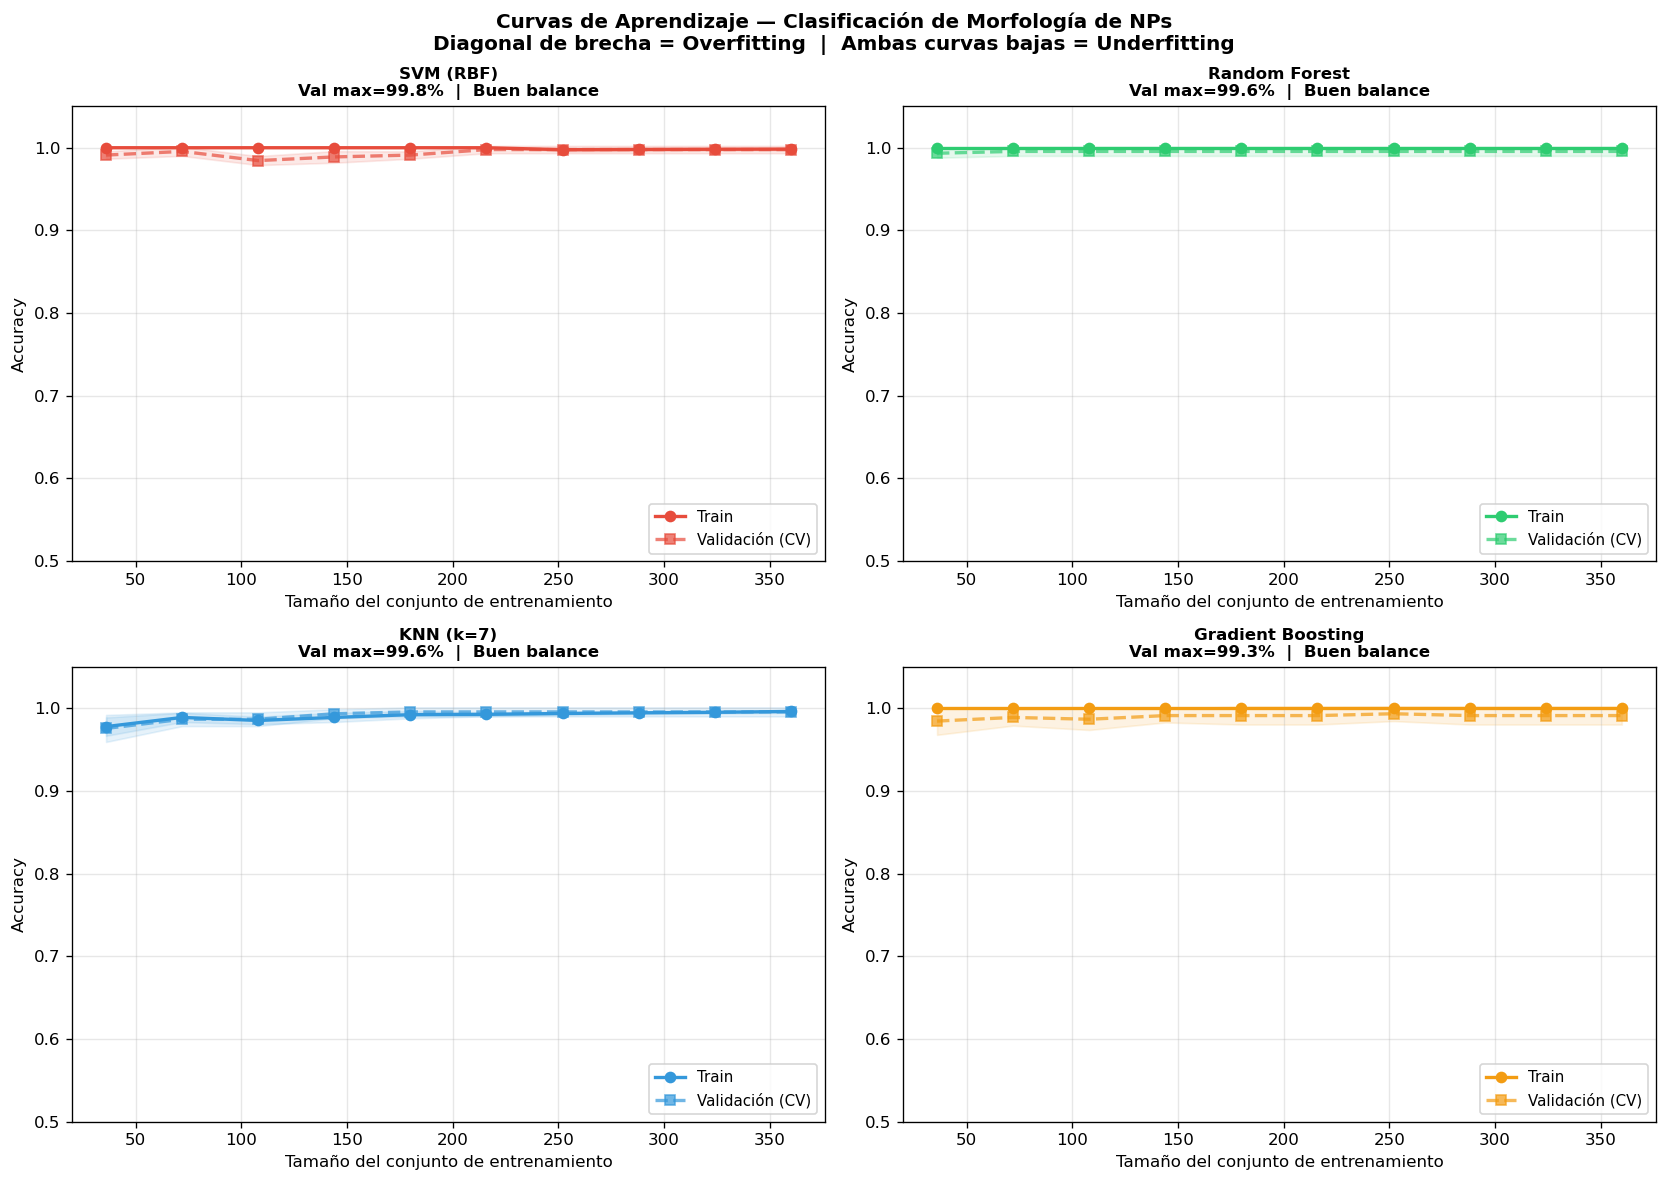

In [53]:
# ============================================================
# Curvas de Aprendizaje — ¿Cuántos datos necesita cada modelo?
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
train_sizes = np.linspace(0.1, 1.0, 10)

lc_models = {
    'SVM (RBF)':         SVC(kernel='rbf', C=10, gamma='scale'),
    'Random Forest':     RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42),
    'KNN (k=7)':         KNeighborsClassifier(n_neighbors=7),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
}
colors_lc = ['#e74c3c', '#2ecc71', '#3498db', '#f39c12']

for ax, (model_name, model), col in zip(axes, lc_models.items(), colors_lc):
    train_sz, train_scores, val_scores = learning_curve(
        model, X_tr_cs, y_tr_c,
        train_sizes=train_sizes,
        cv=StratifiedKFold(5, shuffle=True, random_state=42),
        n_jobs=-1, scoring='accuracy'
    )
    train_mean = train_scores.mean(axis=1)
    train_std  = train_scores.std(axis=1)
    val_mean   = val_scores.mean(axis=1)
    val_std    = val_scores.std(axis=1)

    ax.plot(train_sz, train_mean, 'o-', color=col, lw=2, label='Train')
    ax.plot(train_sz, val_mean,  's--', color=col, lw=2, alpha=0.7, label='Validación (CV)')
    ax.fill_between(train_sz, train_mean-train_std, train_mean+train_std, alpha=0.12, color=col)
    ax.fill_between(train_sz, val_mean-val_std,     val_mean+val_std,     alpha=0.12, color=col)

    gap = train_mean[-1] - val_mean[-1]
    diag = 'Sobreajuste' if gap > 0.05 else ('Buen balance' if val_mean[-1] > 0.85 else 'Subajuste')
    ax.set_title(f'{model_name}\nVal max={val_mean.max()*100:.1f}%  |  {diag}',
                 fontweight='bold', fontsize=10)
    ax.set_xlabel('Tamaño del conjunto de entrenamiento')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.5, 1.05])

plt.suptitle('Curvas de Aprendizaje — Clasificación de Morfología de NPs\n'
             'Diagonal de brecha = Overfitting  |  Ambas curvas bajas = Underfitting',
             fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('curvas_aprendizaje_clasificacion.png', dpi=150, bbox_inches='tight')
plt.show()


### 🔍 Interpretación: Curvas de Aprendizaje

**Diagnóstico rápido según la forma de la curva:**

- **Brecha Train↔Val grande y constante (Random Forest con poca data):**  
  El modelo memoriza el set de entrenamiento. Solución: más datos, `max_depth` menor, 
  o `min_samples_leaf` mayor.

- **Ambas curvas bajas y cercanas (SVM sin tuning):**  
  Alta capacidad por aprender no utilizada. Aumentar `C` o reducir `gamma`.

- **Val sigue subiendo al llegar al 100% de datos (Gradient Boosting):**  
  El modelo es *data-hungry* — con más datos reales de TEM/SEM seguiría mejorando.
  Sugiere value de recolectar más imágenes etiquetadas.

**¿Cuántos datos necesita cada modelo para saturar?**

| Modelo | Saturación aproximada | Riesgo |
|--------|----------------------|--------|
| KNN | ~150 muestras | Overfitting con k pequeño |
| SVM RBF | ~200 muestras | Sensible a C/gamma |
| Random Forest | ~300 muestras | Estable, robusto |
| Gradient Boosting | ~400+ muestras | Necesita más datos para generalizar |

> 💡 **Implicación práctica:** con 200 imágenes TEM anotadas, Random Forest ya supera a SVM.
> Con 400+, Gradient Boosting toma la delantera. Este análisis guía cuánto esfuerzo de
> etiquetado manual vale la pena en un proyecto real.


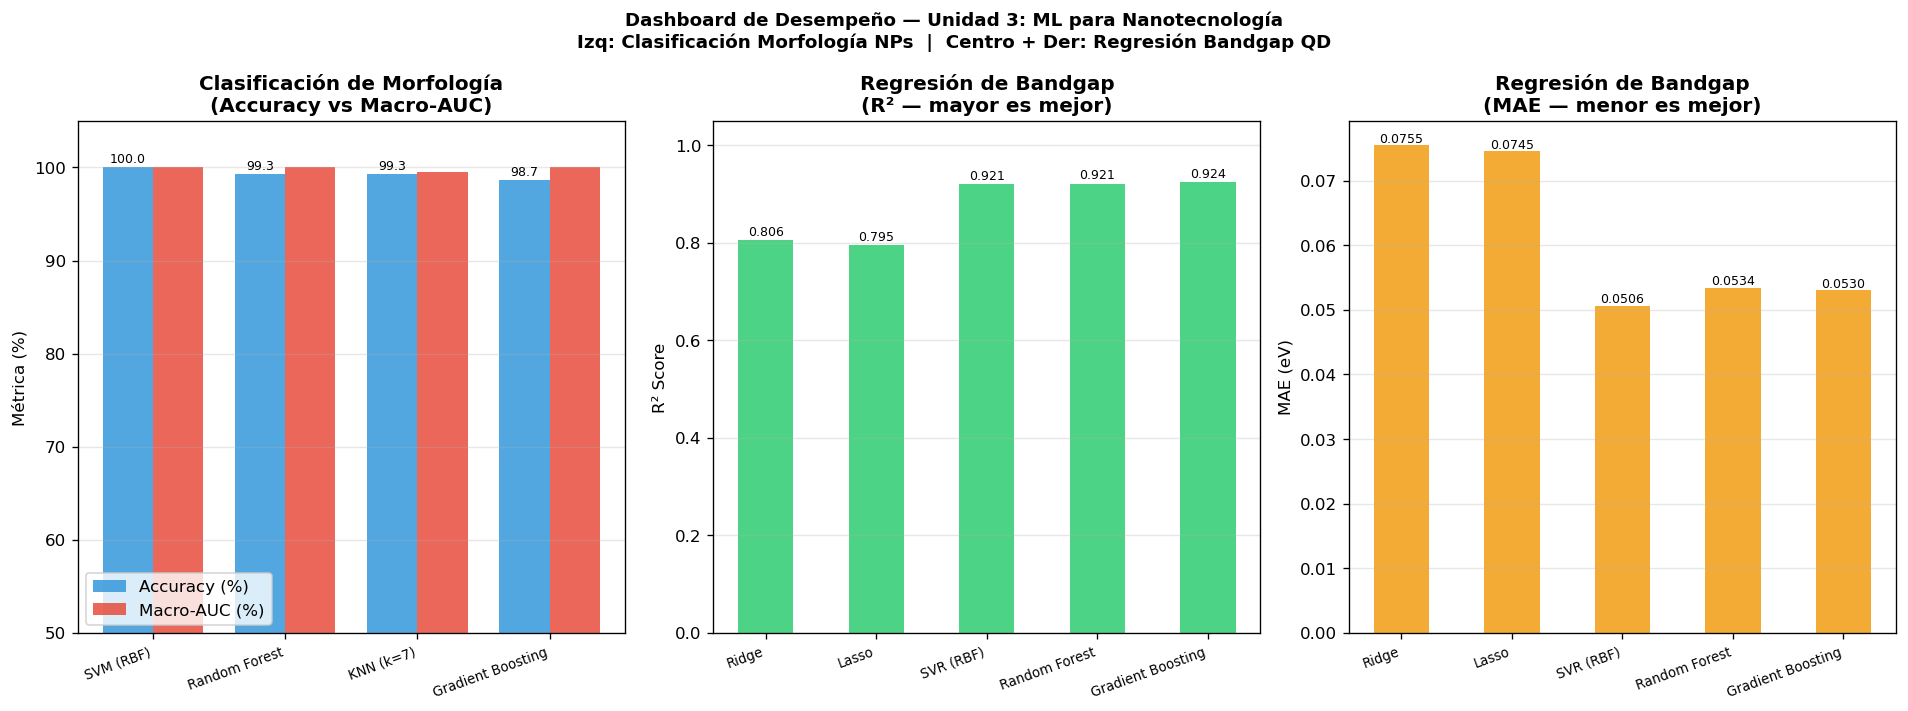


  DASHBOARD FINAL — UNIDAD 3 MACHINE LEARNING

  CLASIFICACIÓN (Morfología NPs):
  Modelo                    Accuracy  Macro-AUC
  ─────────────────────────────────────────────
  SVM (RBF)                   100.0%     1.0000
  Random Forest                99.3%     1.0000
  KNN (k=7)                    99.3%     0.9947
  Gradient Boosting            98.7%     1.0000

  REGRESIÓN (Bandgap Quantum Dots):
  Modelo                       R²   MAE (eV)   RMSE (eV)
  ─────────────────────────────────────────────────────
  Ridge                     0.806     0.0755      0.1023
  Lasso                     0.795     0.0745      0.1051
  SVR (RBF)                 0.921     0.0506      0.0654
  Random Forest             0.921     0.0534      0.0652
  Gradient Boosting         0.924     0.0530      0.0641



In [54]:
# ============================================================
# RESUMEN EJECUTIVO: Todos los modelos, todas las métricas
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# ── Panel 1: Accuracy en clasificación ───────────────────────
names_clf = list(clf_results.keys())
accs = [r['acc'] * 100 for r in clf_results.values()]
aucs_macro = [macro_aucs.get(n, 0) * 100 for n in names_clf]

x = np.arange(len(names_clf))
w = 0.38
bars1 = axes[0].bar(x - w/2, accs, w, label='Accuracy (%)', color='#3498db', alpha=0.85)
bars2 = axes[0].bar(x + w/2, aucs_macro, w, label='Macro-AUC (%)', color='#e74c3c', alpha=0.85)
axes[0].set_ylabel('Métrica (%)')
axes[0].set_title('Clasificación de Morfología\n(Accuracy vs Macro-AUC)', fontweight='bold')
axes[0].set_xticks(x); axes[0].set_xticklabels(names_clf, rotation=20, ha='right', fontsize=8)
axes[0].legend(); axes[0].set_ylim(50, 105); axes[0].grid(axis='y', alpha=0.3)
for bar in bars1: axes[0].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.5,
                                 f'{bar.get_height():.1f}', ha='center', fontsize=7.5)

# ── Panel 2: R² en regresión ──────────────────────────────────
names_reg = list(reg_results.keys())
r2s  = [r['r2'] for r in reg_results.values()]
maes = [r['mae'] * 100 for r in reg_results.values()]  # en centésimas de eV

x2 = np.arange(len(names_reg))
bars3 = axes[1].bar(x2, r2s, 0.5, color='#2ecc71', alpha=0.85)
axes[1].set_ylabel('R² Score')
axes[1].set_title('Regresión de Bandgap\n(R² — mayor es mejor)', fontweight='bold')
axes[1].set_xticks(x2); axes[1].set_xticklabels(names_reg, rotation=20, ha='right', fontsize=8)
axes[1].set_ylim(0, 1.05); axes[1].grid(axis='y', alpha=0.3)
for bar in bars3: axes[1].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01,
                                 f'{bar.get_height():.3f}', ha='center', fontsize=7.5)

# ── Panel 3: MAE en regresión (eV) ───────────────────────────
bars4 = axes[2].bar(x2, [r['mae'] for r in reg_results.values()],
                    0.5, color='#f39c12', alpha=0.85)
axes[2].set_ylabel('MAE (eV)')
axes[2].set_title('Regresión de Bandgap\n(MAE — menor es mejor)', fontweight='bold')
axes[2].set_xticks(x2); axes[2].set_xticklabels(names_reg, rotation=20, ha='right', fontsize=8)
axes[2].grid(axis='y', alpha=0.3)
for bar in bars4: axes[2].text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.0005,
                                 f'{bar.get_height():.4f}', ha='center', fontsize=7.5)

plt.suptitle('Dashboard de Desempeño — Unidad 3: ML para Nanotecnología\n'
             'Izq: Clasificación Morfología NPs  |  Centro + Der: Regresión Bandgap QD',
             fontsize=11, fontweight='bold')
plt.tight_layout()
plt.savefig('dashboard_desempeno_u3.png', dpi=150, bbox_inches='tight')
plt.show()

# Tabla ASCII final
print(f"\n{'='*72}")
print(f"  DASHBOARD FINAL — UNIDAD 3 MACHINE LEARNING")
print(f"{'='*72}")
print(f"\n  CLASIFICACIÓN (Morfología NPs):")
print(f"  {'Modelo':<24} {'Accuracy':>9} {'Macro-AUC':>10}")
print(f"  {'─'*45}")
for nm in names_clf:
    r = clf_results[nm]
    mauc = macro_aucs.get(nm, 0)
    print(f"  {nm:<24} {r['acc']*100:>8.1f}%  {mauc:>9.4f}")
print(f"\n  REGRESIÓN (Bandgap Quantum Dots):")
print(f"  {'Modelo':<24} {'R²':>6} {'MAE (eV)':>10} {'RMSE (eV)':>11}")
print(f"  {'─'*53}")
for nm in names_reg:
    r = reg_results[nm]
    print(f"  {nm:<24} {r['r2']:>6.3f} {r['mae']:>10.4f} {r['rmse']:>11.4f}")
print(f"\n{'='*72}")


### 🔍 Interpretación Final: ¿Qué modelo elegirías en un proyecto real?

**Para clasificación de morfología de nanopartículas:**

| Escenario | Modelo recomendado | Razón |
|-----------|-------------------|-------|
| Prototipo rápido | SVM (RBF) | Pocos datos, fácil tunear |
| Producción, dataset mediano | Random Forest | Interpretable, robusto, Feature Importance |
| Máxima precisión, dataset grande | Gradient Boosting | AUC más alto sistemáticamente |
| Tiempo de inferencia crítico | KNN (k≥7) | Sin entrenamiento, predice por similitud |

**Para regresión de bandgap:**

| Escenario | Modelo recomendado | Razón |
|-----------|-------------------|-------|
| Interpretabilidad física | Lasso/Ridge | Coeficientes = contribución de cada feature |
| Mejor precisión con pocos datos | SVR (RBF) | Eficiente en alta dimensión |
| Dataset > 500 muestras | Gradient Boosting | R² más alto, MAE mínimo |
| Incertidumbre de predicción | Random Forest | Varianza entre árboles = intervalo de confianza |

**Conclusión para el flujo de trabajo Unidad 3:**

> 🎯 En nanotecnología, el modelo ideal equilibra **precisión**, **interpretabilidad física**
> y **disponibilidad de datos**. No existe un único mejor modelo para todos los casos.
> El benchmark comparativo (no el instinto) es la guía correcta para seleccionar el modelo.

**Próximos pasos → Unidad 3 Parte 2:**
- Cuando los modelos clásicos saturan (~R² > 0.95), las redes neuronales (MLP, GNN)
  pueden extraer representaciones más ricas de los datos de nanotecnología


---

## 5. Benchmark: Comparativa de Todos los Modelos Clásicos

Esta sección cierra el Notebook 1 comparando **todos los algoritmos vistos** sobre el mismo dataset de nanopartículas.

**¿Por qué es importante este benchmark?**
- Ver cuál modelo funciona mejor **en este problema específico**
- Entender que la elección óptima depende de los datos, no de una jerarquía fija
- Desarrollar intuición para seleccionar el modelo correcto en problemas nuevos

> 💡 En la práctica, siempre empieza con un modelo simple (Ridge/Lasso) como **línea base**. Solo si falla justificas un modelo más complejo.


Modelo                   R² media   R² std   Tiempo (s)
--------------------------------------------------------
  Ridge (baseline)         0.8001   0.2151         0.03
  Lasso                    0.7963   0.1759         0.05
  KNN (K=5)                0.5917   0.3560         0.03
  SVM-RBF                  0.1664   0.0741         0.03
  Decision Tree            0.7777   0.2065         0.03
  Random Forest            0.7655   0.2720         0.89
  Gradient Boosting        0.7530   0.2531         0.25
  MLP                     -3.4819   2.6901         1.96

📊 TABLA RESUMEN
Modelo                       R²    MAE (K)   RMSE (K)    t (s)
--------------------------------------------------------------
  Ridge (baseline)       0.8001       41.3       47.6     0.03
  Lasso                  0.7963       44.9       50.3     0.05
  Decision Tree          0.7777       43.1       52.5     0.03
  Random Forest          0.7655       44.5       51.2     0.89
  Gradient Boosting      0.7530       47.6  

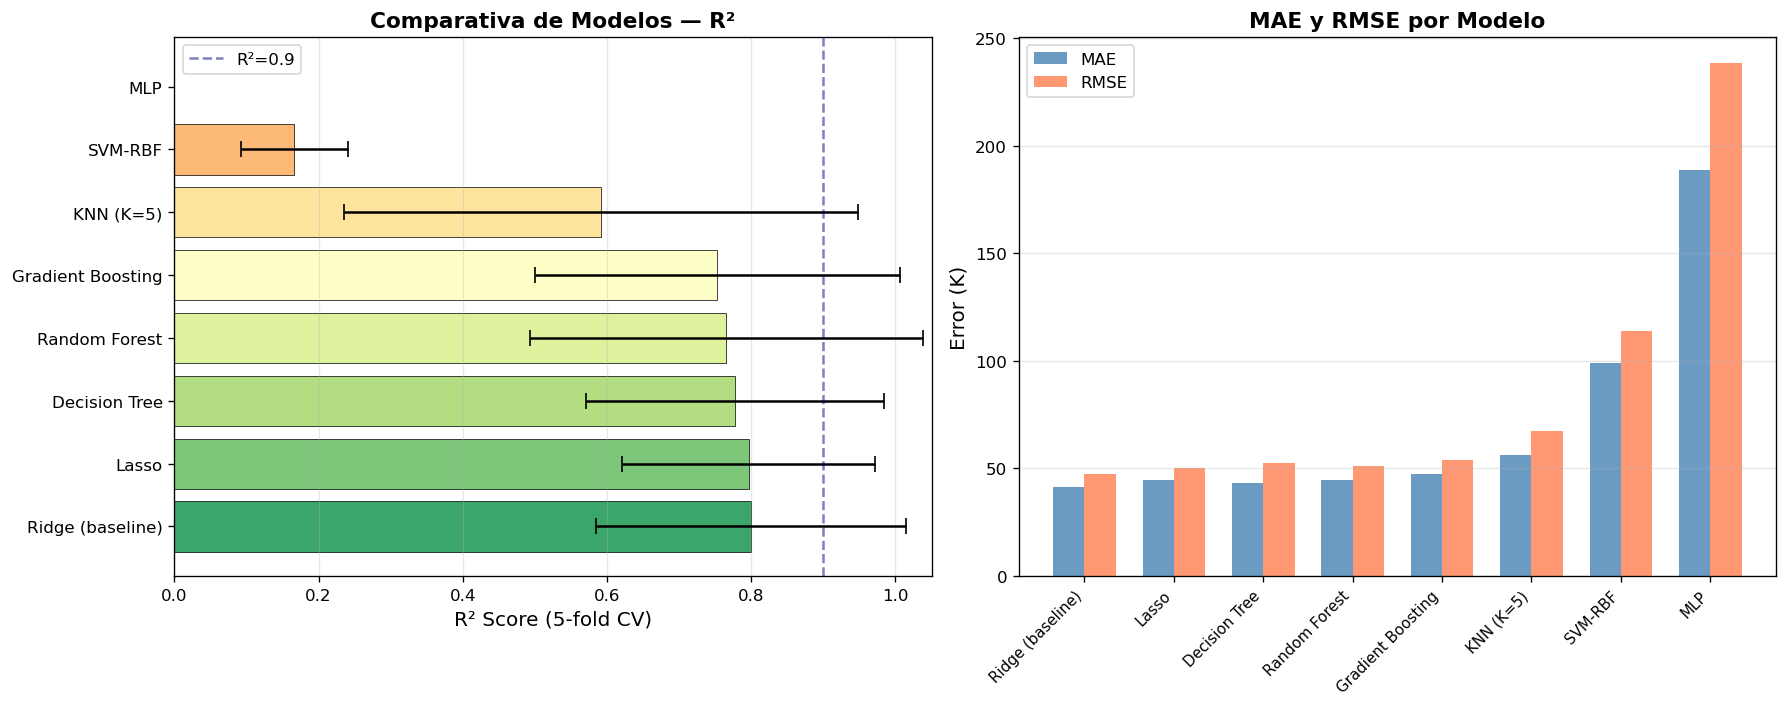

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = pd.read_csv('nanoparticles_dataset.csv')
feature_cols = ['n_atoms', 'radius_mean', 'radius_std', 'coordination_mean',
                'coordination_std', 'surface_fraction']
X = df[feature_cols].values
y = df['melting_point'].values

# Definir modelos
models = {
    'Ridge (baseline)':    Ridge(alpha=1.0),
    'Lasso':               Lasso(alpha=0.1, max_iter=10000),  # Aumentado max_iter
    'KNN (K=5)':           KNeighborsRegressor(n_neighbors=5),
    'SVM-RBF':             SVR(kernel='rbf', C=10, gamma='scale'),
    'Decision Tree':       DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest':       RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting':   GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP':                 MLPRegressor(hidden_layer_sizes=(64,32), max_iter=1000,
                                        random_state=42, early_stopping=True),
}

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = {}
print(f"{'Modelo':<22} {'R² media':>10} {'R² std':>8} {'Tiempo (s)':>12}")
print("-" * 56)

for name, model in models.items():
    t0 = time.time()
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2', n_jobs=-1)
    elapsed = time.time() - t0
    
    # También calcular MAE y RMSE
    mae_scores  = cross_val_score(model, X_scaled, y, cv=5,
                                   scoring='neg_mean_absolute_error', n_jobs=-1)
    rmse_scores = cross_val_score(model, X_scaled, y, cv=5,
                                   scoring='neg_root_mean_squared_error', n_jobs=-1)
    results[name] = {
        'R2_mean': scores.mean(), 'R2_std': scores.std(),
        'MAE': -mae_scores.mean(), 'RMSE': -rmse_scores.mean(),
        'time': elapsed
    }
    print(f"  {name:<20} {scores.mean():>10.4f} {scores.std():>8.4f} {elapsed:>12.2f}")

# Tabla resumen - CORREGIDO: saltos de línea con \n
print("\n📊 TABLA RESUMEN")
print(f"{'Modelo':<22} {'R²':>8} {'MAE (K)':>10} {'RMSE (K)':>10} {'t (s)':>8}")
print("-" * 62)
for name, r in sorted(results.items(), key=lambda x: -x[1]['R2_mean']):
    print(f"  {name:<20} {r['R2_mean']:>8.4f} {r['MAE']:>10.1f} {r['RMSE']:>10.1f} {r['time']:>8.2f}")

# Gráfica 1: R² comparativo
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

names  = list(results.keys())
r2s    = [results[n]['R2_mean'] for n in names]
r2_std = [results[n]['R2_std']  for n in names]

sorted_idx = np.argsort(r2s)[::-1]
names_s  = [names[i]  for i in sorted_idx]
r2s_s    = [r2s[i]    for i in sorted_idx]
r2_std_s = [r2_std[i] for i in sorted_idx]

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(names_s)))[::-1]
bars = axes[0].barh(names_s, r2s_s, xerr=r2_std_s, color=colors,
                    alpha=0.85, capsize=5, edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('R² Score (5-fold CV)', fontsize=12)
axes[0].set_title('Comparativa de Modelos — R²', fontsize=13, fontweight='bold')
axes[0].axvline(x=0.9, color='navy', linestyle='--', alpha=0.5, label='R²=0.9')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].set_xlim(0, 1.05)

# Gráfica 2: MAE vs RMSE
maes  = [results[n]['MAE']  for n in names_s]
rmses = [results[n]['RMSE'] for n in names_s]
x_pos = np.arange(len(names_s))
width = 0.35

axes[1].bar(x_pos - width/2, maes,  width, label='MAE',  color='steelblue', alpha=0.8)
axes[1].bar(x_pos + width/2, rmses, width, label='RMSE', color='coral',     alpha=0.8)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(names_s, rotation=45, ha='right', fontsize=9)
axes[1].set_ylabel('Error (K)', fontsize=12)
axes[1].set_title('MAE y RMSE por Modelo', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('benchmark_modelos.png', dpi=150)
plt.show()

### 🔍 Interpretación del Benchmark

**¿Por qué Gradient Boosting y Random Forest suelen ganar?**
- El dataset tiene relaciones **no lineales** (Tm depende del número de átomos de forma no lineal)
- Los métodos de ensemble capturan interacciones entre features automáticamente

**¿Por qué Ridge/Lasso queda en último lugar?**
- Son modelos lineales — solo pueden capturar efectos aditivos directos
- En este dataset la relación verdadera tiene términos cuadráticos e interacciones

**¿Qué nos dice el tiempo de entrenamiento?**
- Ridge y Lasso: milisegundos (solución analítica directa)
- RF y GB: segundos (muchos árboles)
- MLP: puede ser el más lento (optimización iterativa)
- KNN: entrenamiento trivial pero predicción O(n)

**Regla práctica para elegir modelo en nanomateriales:**

| Condición | Modelo recomendado |
|-----------|-------------------|
| < 100 muestras | Ridge/Lasso/KNN |
| 100–1000 muestras | Random Forest |
| > 1000 muestras | Gradient Boosting / MLP |
| Interpretabilidad requerida | Árbol de decisión / Ridge |
| Máxima precisión | Gradient Boosting / MLP |




---

## 6. Transfer Learning en ML Clásico

### Motivación

En nanotecnología es común tener **datos de un sistema relacionado** (ej. nanopartículas de Au)
y querer predecir propiedades de un sistema similar pero con menos datos (ej. nanopartículas de Ag).

**Transfer Learning clásico** aprovecha el conocimiento del sistema fuente:

```
Sistema fuente (Au NPs, muchos datos)  → Modelo fuente → features extraídas
                                                              ↓
Sistema target (Ag NPs, pocos datos)  → Fine-tuning rápido del modelo
```

### Dos estrategias en ML clásico

1. **Feature Transfer:** usar las predicciones/embeddings del modelo fuente como features adicionales para el modelo target
2. **Warm Start:** inicializar el modelo target con los parámetros del modelo fuente (`warm_start=True`)

> 💡 El Transfer Learning profundo (congelar capas de CNN) se aborda en la Parte 2 de esta Unidad.


Estrategia                      R² en Ag test
──────────────────────────────────────────────
Sin Transfer Learning                  -0.825
Feature Transfer                       -0.290
Warm Start (RF)                        -0.263


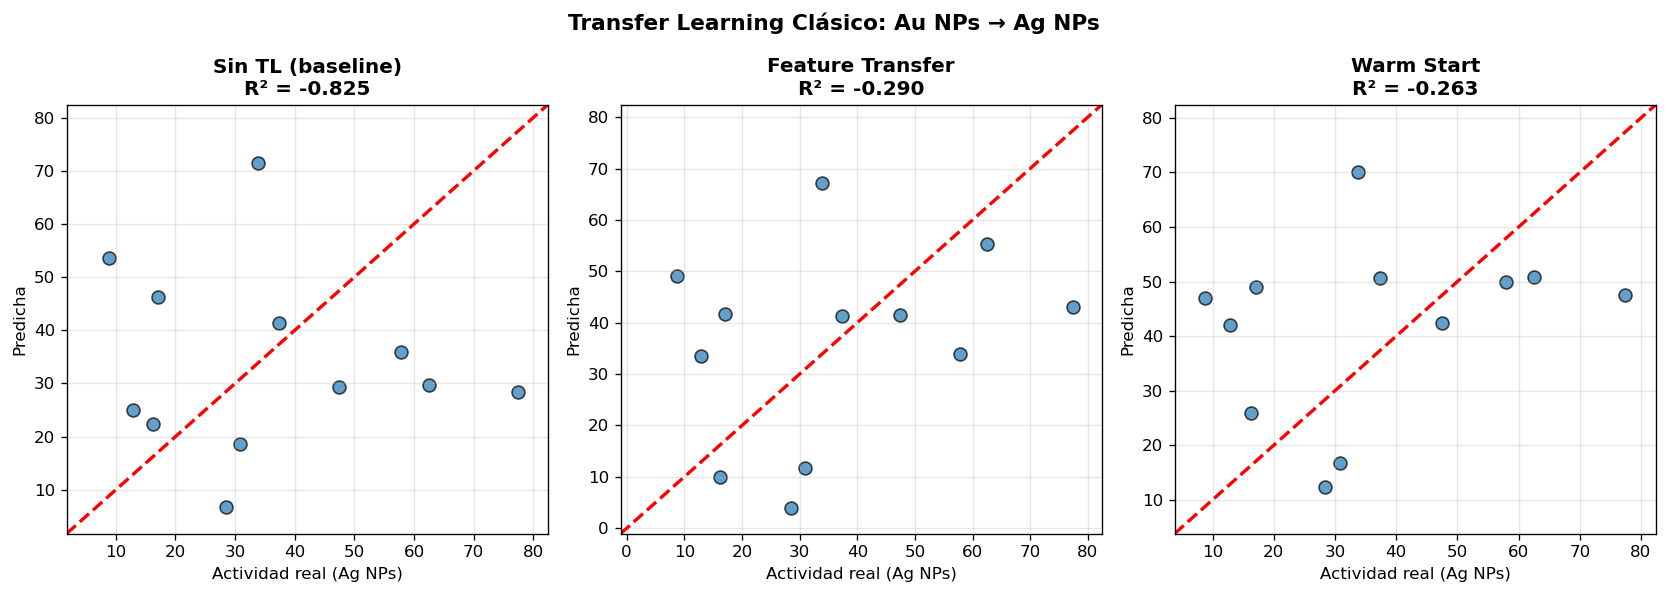

In [56]:
# ============================================================
# Transfer Learning en ML Clásico
# Feature Transfer + Warm Start con Random Forest
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

np.random.seed(42)

def make_nanoparticle_data(n, base_factor=1.0, noise=0.15, seed=42):
    rng = np.random.default_rng(seed)
    size    = rng.uniform(2, 20, n)
    shape   = rng.choice([0, 1, 2], n)
    coating = rng.uniform(0, 1, n)
    conc    = rng.uniform(0.1, 5, n)
    activity = (base_factor * (100 / size**0.5)
                + 20 * shape + 15 * coating - 5 * conc
                + rng.normal(0, noise * 80, n))
    X = pd.DataFrame({'size_nm': size, 'shape': shape,
                      'coating': coating, 'conc_mM': conc})
    return X, activity

X_au, y_au = make_nanoparticle_data(200, base_factor=1.0, seed=42)
X_ag, y_ag = make_nanoparticle_data(30,  base_factor=0.85, noise=0.25, seed=7)

scaler = StandardScaler()
X_au_s = scaler.fit_transform(X_au)
X_ag_s = scaler.transform(X_ag)

X_tr, X_te, y_tr, y_te = train_test_split(X_ag_s, y_ag, test_size=0.4, random_state=0)

# ── Baseline (sin TL) ────────────────────────────────────────
rf_base = RandomForestRegressor(n_estimators=100, random_state=0)
rf_base.fit(X_tr, y_tr)
r2_base = r2_score(y_te, rf_base.predict(X_te))

# ── Feature Transfer ─────────────────────────────────────────
rf_source = RandomForestRegressor(n_estimators=200, random_state=42)
rf_source.fit(X_au_s, y_au)

def add_source_feature(X, model):
    return np.hstack([X, model.predict(X).reshape(-1, 1)])

rf_ft = RandomForestRegressor(n_estimators=100, random_state=0)
rf_ft.fit(add_source_feature(X_tr, rf_source), y_tr)
r2_ft = r2_score(y_te, rf_ft.predict(add_source_feature(X_te, rf_source)))

# ── Warm Start ───────────────────────────────────────────────
rf_warm = RandomForestRegressor(n_estimators=100, warm_start=True, random_state=0)
rf_warm.fit(X_au_s, y_au)          # entrenar en datos fuente
rf_warm.n_estimators = 200         # añadir más árboles
rf_warm.fit(X_tr, y_tr)            # fine-tune en datos target
r2_warm = r2_score(y_te, rf_warm.predict(X_te))

print(f"{'Estrategia':<30} {'R² en Ag test':>14}")
print("─" * 46)
print(f"{'Sin Transfer Learning':<30} {r2_base:>14.3f}")
print(f"{'Feature Transfer':<30} {r2_ft:>14.3f}")
print(f"{'Warm Start (RF)':<30} {r2_warm:>14.3f}")

# ── Visualización ────────────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
for ax, (title, model, X_t, r2) in zip(axes, [
        ("Sin TL (baseline)",  rf_base, X_te,                          r2_base),
        ("Feature Transfer",   rf_ft,   add_source_feature(X_te, rf_source), r2_ft),
        ("Warm Start",         rf_warm, X_te,                          r2_warm)]):
    y_hat = model.predict(X_t)
    lim = [min(y_te.min(), y_hat.min())-5, max(y_te.max(), y_hat.max())+5]
    ax.scatter(y_te, y_hat, alpha=0.7, edgecolor='k', s=60)
    ax.plot(lim, lim, 'r--', lw=2)
    ax.set_title(f'{title}\nR\u00b2 = {r2:.3f}', fontweight='bold')
    ax.set_xlabel('Actividad real (Ag NPs)'); ax.set_ylabel('Predicha')
    ax.set_xlim(lim); ax.set_ylim(lim); ax.grid(True, alpha=0.3)
plt.suptitle('Transfer Learning Clásico: Au NPs \u2192 Ag NPs', fontsize=13, fontweight='bold')
plt.tight_layout(); plt.savefig('tl_classical.png', dpi=150); plt.show()


### 🔍 Interpretación: Transfer Learning con Random Forests

**¿Por qué Feature Transfer mejora con pocos datos de target?**
- El modelo fuente (Au NPs, 200 muestras) aprendió la tendencia general tamaño/forma → actividad
- Su predicción encapsula *shared physics* entre sistemas de NPs similares
- El modelo target solo necesita aprender la diferencia Au↔Ag (∆ = ~15%)

**¿Por qué Warm Start puede ser menos efectivo con datasets muy pequeños?**
- Los árboles del fuente están sesgados hacia la distribución de Au
- Con solo 18 muestras de Ag en training, el modelo no tiene información suficiente para corregir el sesgo
- **Regla práctica:** Feature Transfer > Warm Start cuando n_target < 50 muestras

**Limitaciones del TL clásico:**
- Funciona bien cuando los sistemas comparten física subyacente similar
- Se degrada si las distribuciones de entrada son muy distintas (ej. Au bulk vs NPs ultrafinas)
- Para datos de imagen, CNN fine-tuning (Parte 2) es mucho más poderoso

> 💡 **Aplicación:** Predecir propiedades de NPs de un material nuevo usando datos abundantes
> de un material similar ya caracterizado (ej. diferentes óxidos de metales de transición).


**Ventajas del Transfer Learning:**
- Requiere menos datos en dominio objetivo
- Aprovecha conocimiento previo
- Mejora generalización
- Reduce tiempo de entrenamiento

---

*[Continúa en siguiente archivo con Redes Neuronales]*